In [1]:
#pip install shap

In [ ]:
## Importing relevant libraries

import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature selection and class imbalance handling libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ML libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve

# Interpretability libraries
import shap

# Sub-Group Analysis
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE  # for cluster visualization in 2D space

# Show all columns
pd.set_option('display.max_columns', None)

# Stop warnings
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [ ]:
## Loading the data

data = pd.read_excel('CKD dataset.xlsx')
print(data.shape)
data.head()

(491, 25)


,StudyID,Gender,AgeBaseline,Age.3.categories,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35
0,1,0,64,1,0,0,0,0,1,1,1,1,0,1,0,4.8,0.92,5.90,59.0,93.319050,144,87,40.161842,98,0
1,2,0,52,1,0,0,0,0,1,1,1,0,0,1,0,6.4,1.84,6.00,52.0,105.833836,148,91,44.536941,106,0
2,3,0,56,1,0,0,0,0,1,1,1,1,0,1,0,6.4,1.75,5.90,57.0,99.839823,149,86,40.543437,88,0
3,4,0,58,1,0,0,0,0,0,1,1,1,0,0,0,5.1,1.22,5.50,65.0,90.315159,116,68,32.025584,103,0
4,5,0,63,1,1,0,0,0,1,1,1,1,1,1,1,5.0,1.11,7.46,70.0,79.725199,132,63,30.757401,105,0


**We have loaded the dataset, which contains a total of 491 records and 25 columns. Although each column has numerical values, this does not imply that all variables are numerical. For example, the column `Gender` has values 0 and 1, representing categories. Thus, our dataset is a mix of categorical and numerical variables. We need to determine which columns are numerical and which are categorical by examining the definitions of each column.**

## 1. DATA PREPARATION AND EXPLORATORY DATA ANALYSIS

In [ ]:
## Dataset Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudyID                491 non-null    int64  
 1   Gender                 491 non-null    int64  
 2   AgeBaseline            491 non-null    int64  
 3   Age.3.categories       491 non-null    int64  
 4   HistoryDiabetes        491 non-null    int64  
 5   HistoryCHD             491 non-null    int64  
 6   HistoryVascular        491 non-null    int64  
 7   HistorySmoking         491 non-null    int64  
 8   HistoryHTN             491 non-null    int64  
 9   HistoryDLD             491 non-null    int64  
 10  HistoryObesity         491 non-null    int64  
 11  DLDmeds                491 non-null    int64  
 12  DMmeds                 491 non-null    int64  
 13  HTNmeds                491 non-null    int64  
 14  ACEIARB                491 non-null    int64  
 15  Choles

**In the dataset information, we can see that all the columns have numerical data types, either integers or floats. Most columns do not have any missing values, but we observe some missing values in the columns `TriglyceridesBaseline` and `HgbA1C`.**

### Handling Missing Values

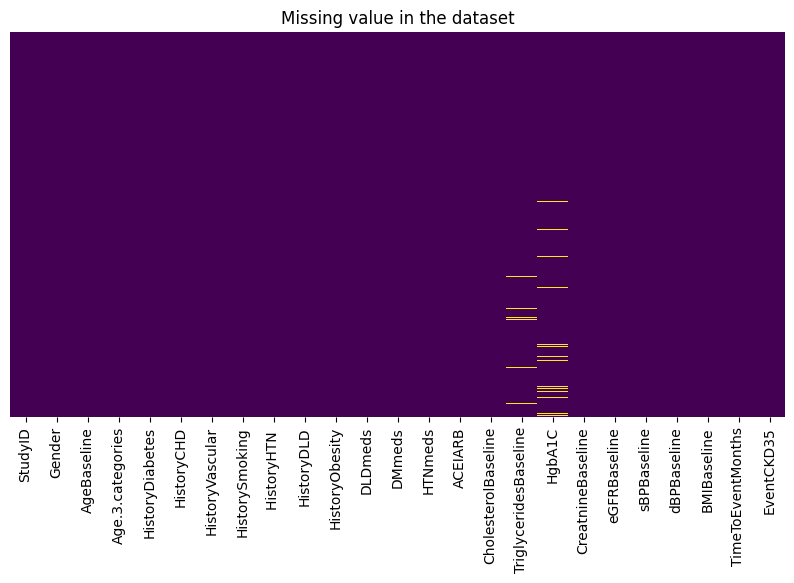

In [ ]:
## Plotting the missing values

plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset')
plt.show()

**This plot is a visual representation of the missing values, where purple indicates present values and yellow indicates missing values. It provides a clear view of the distribution of missing values across the dataset on a row-wise basis.**

In [ ]:
## Missing values percentage

missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / data.shape[0] * 100
missing_values

TriglyceridesBaseline    1.221996
HgbA1C                   3.054990
dtype: float64

**The missing value percentage for `TriglyceridesBaseline` is 1.2%, and for `HgbA1C` it is 3%.**

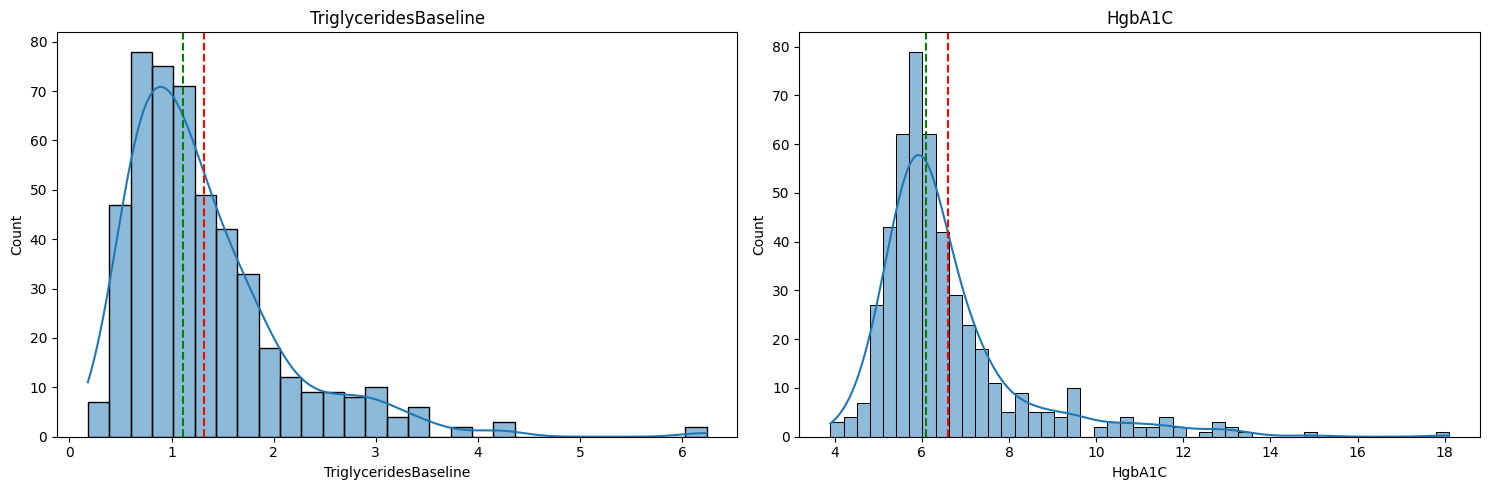

In [ ]:
## Plotting the distribution of the columns with missing values

col_with_missing_values = missing_values.index

plt.figure(figsize=(15, 5))
for i, col in enumerate(col_with_missing_values):
    plt.subplot(1, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)

    # Adding mean and median
    plt.axvline(data[col].mean(), color='red', linestyle='--', label='mean')
    plt.axvline(data[col].median(), color='green', linestyle='--', label='median')

plt.tight_layout()
plt.show()

**This plot shows the distribution of the two columns with missing values. This distribution helps us decide how to handle and replace the missing values. Replacing them with the median appears to be a better choice for these two columns, as most records have values closer to the median.**

In [ ]:
## Filling the missing values with the median

data.fillna(data.median(), inplace=True)
print(f'Number of missing values in the dataset: {data.isnull().sum().sum()}')

Number of missing values in the dataset: 0


**The missing values have been filled with the median, and there are no remaining missing values in the dataset.**

### Explorataory Data Analysis

In [ ]:
data.head()

,StudyID,Gender,AgeBaseline,Age.3.categories,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35
0,1,0,64,1,0,0,0,0,1,1,1,1,0,1,0,4.8,0.92,5.90,59.0,93.319050,144,87,40.161842,98,0
1,2,0,52,1,0,0,0,0,1,1,1,0,0,1,0,6.4,1.84,6.00,52.0,105.833836,148,91,44.536941,106,0
2,3,0,56,1,0,0,0,0,1,1,1,1,0,1,0,6.4,1.75,5.90,57.0,99.839823,149,86,40.543437,88,0
3,4,0,58,1,0,0,0,0,0,1,1,1,0,0,0,5.1,1.22,5.50,65.0,90.315159,116,68,32.025584,103,0
4,5,0,63,1,1,0,0,0,1,1,1,1,1,1,1,5.0,1.11,7.46,70.0,79.725199,132,63,30.757401,105,0


In [ ]:
## Defining the categorical and numerical columns

cat_cols = ['Gender', 'Age.3.categories', 'HistoryDiabetes', 'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN ',
            'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds', 'ACEIARB', 'EventCKD35']
num_cols = data.columns.difference(cat_cols)

print(f'Total number of categorical columns: {len(cat_cols)}')
print(f'Total number of numerical columns: {len(num_cols)}')

Total number of categorical columns: 14
Total number of numerical columns: 11


**Now we will start the exploratory data analysis. The first step is defining the categorical and numerical variables. Variables such as `Gender`, `Age.3.categories`, `HistoryDiabetes`, `HistoryCHD`, `HistoryVascular`, `HistorySmoking`, and similar ones are classified as categorical variables. In contrast, variables like `Age`, `CholesterolBaseline`, `CreatnineBaseline`, and similar ones are classified as numerical variables.**

In [ ]:
## Data description for numerical columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeBaseline,491.0,53.203666,13.821282,23.000000,44.000000,54.000000,64.000000,89.000000
BMIBaseline,491.0,30.185509,6.209319,12.698962,25.959530,29.570312,33.185157,56.797436
CholesterolBaseline,491.0,4.978574,1.096702,2.230000,4.200000,5.000000,5.770000,9.300000
CreatnineBaseline,491.0,67.856823,17.918627,6.000000,55.000000,66.000000,78.500000,123.000000
HgbA1C,491.0,6.581792,1.689738,3.900000,5.700000,6.100000,6.900000,18.100000
StudyID,491.0,333.539715,258.046349,1.000000,131.500000,273.000000,438.500000,968.000000
TimeToEventMonths,491.0,83.065173,26.011140,0.000000,77.000000,93.000000,100.000000,111.000000
TriglyceridesBaseline,491.0,1.312621,0.788592,0.180000,0.780000,1.110000,1.615000,6.240000
dBPBaseline,491.0,76.871690,10.711134,41.000000,69.000000,77.000000,83.000000,112.000000
eGFRBaseline,491.0,98.117567,18.502058,60.049838,86.418626,98.054429,109.450408,242.615536


**In the dataset description, we can see the numerical variables' descriptive analysis, including statistics like mean, standard deviation, minimum value, maximum value, and median values. There are no missing values. We can observe that the ranges of the columns are different, which may require scaling before using any ML model.**

In [ ]:
## Data properties for categorical columns

for col in cat_cols:
    print(f'Column: {col} | Number of unique values: {data[col].nunique()}')

Column: Gender | Number of unique values: 2
Column: Age.3.categories | Number of unique values: 3
Column: HistoryDiabetes | Number of unique values: 2
Column: HistoryCHD | Number of unique values: 2
Column: HistoryVascular | Number of unique values: 2
Column: HistorySmoking | Number of unique values: 2
Column: HistoryHTN  | Number of unique values: 2
Column: HistoryDLD | Number of unique values: 2
Column: HistoryObesity | Number of unique values: 2
Column: DLDmeds | Number of unique values: 2
Column: DMmeds | Number of unique values: 2
Column: HTNmeds | Number of unique values: 2
Column: ACEIARB | Number of unique values: 2
Column: EventCKD35 | Number of unique values: 2


**For the categorical variables, we have identified the number of unique values. Most columns are binary, containing either 0 or 1 as values. However, the `Age.3.categories` variable has three distinct categories.**

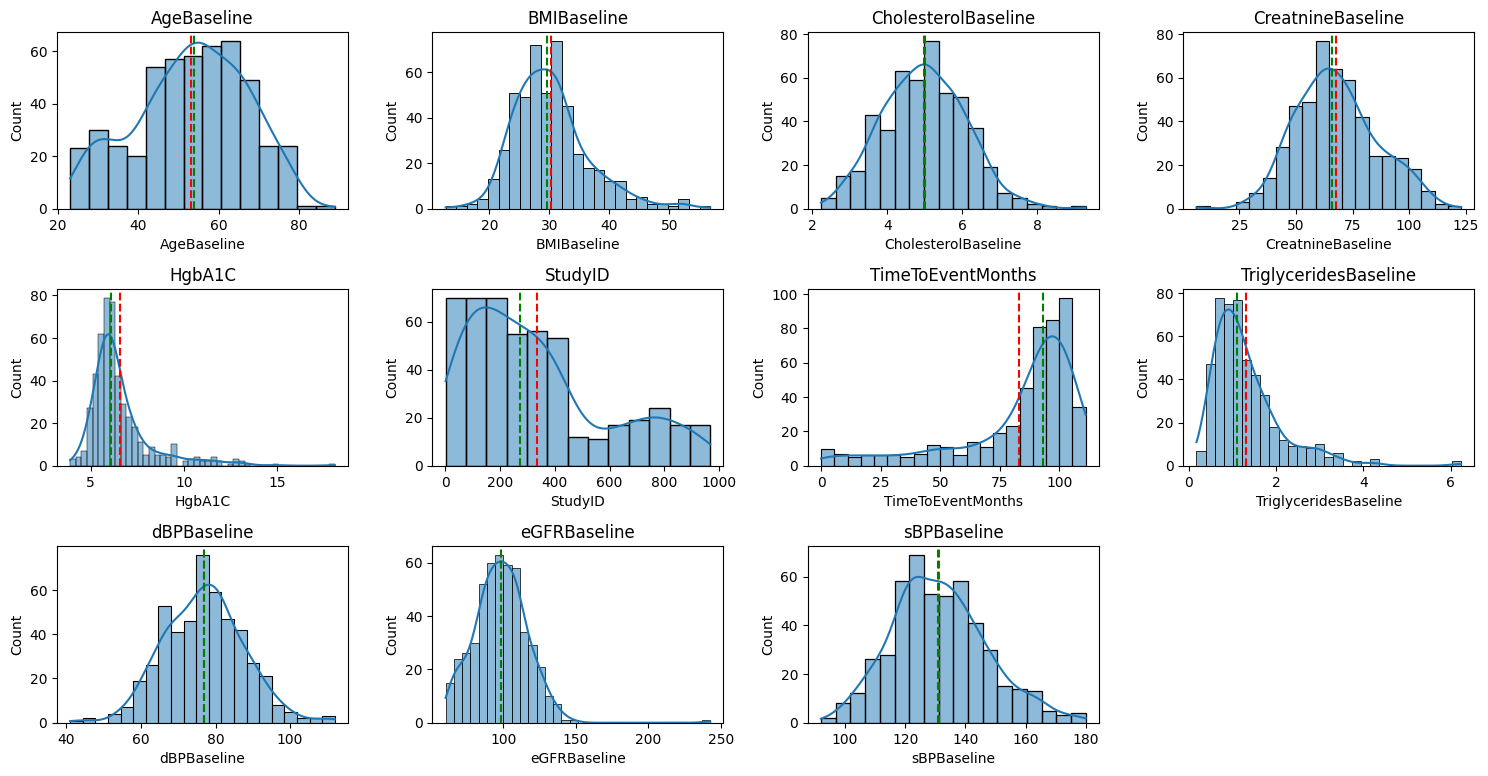

In [ ]:
## Plotting distribution of numerical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    # Adding mean and median
    plt.axvline(data[col].mean(), color='red', linestyle='--', label='mean')
    plt.axvline(data[col].median(), color='green', linestyle='--', label='median')
plt.tight_layout()
plt.show()

**This plot illustrates the distribution of numerical variables. Most columns exhibit a normal distribution with a bell-shaped curve, except for `StudyID`, which shows a uniform distribution. Since each record in the dataset has a unique study ID, we do not need to include it as a feature. However, aside from study ID, most columns display a normal distribution.**

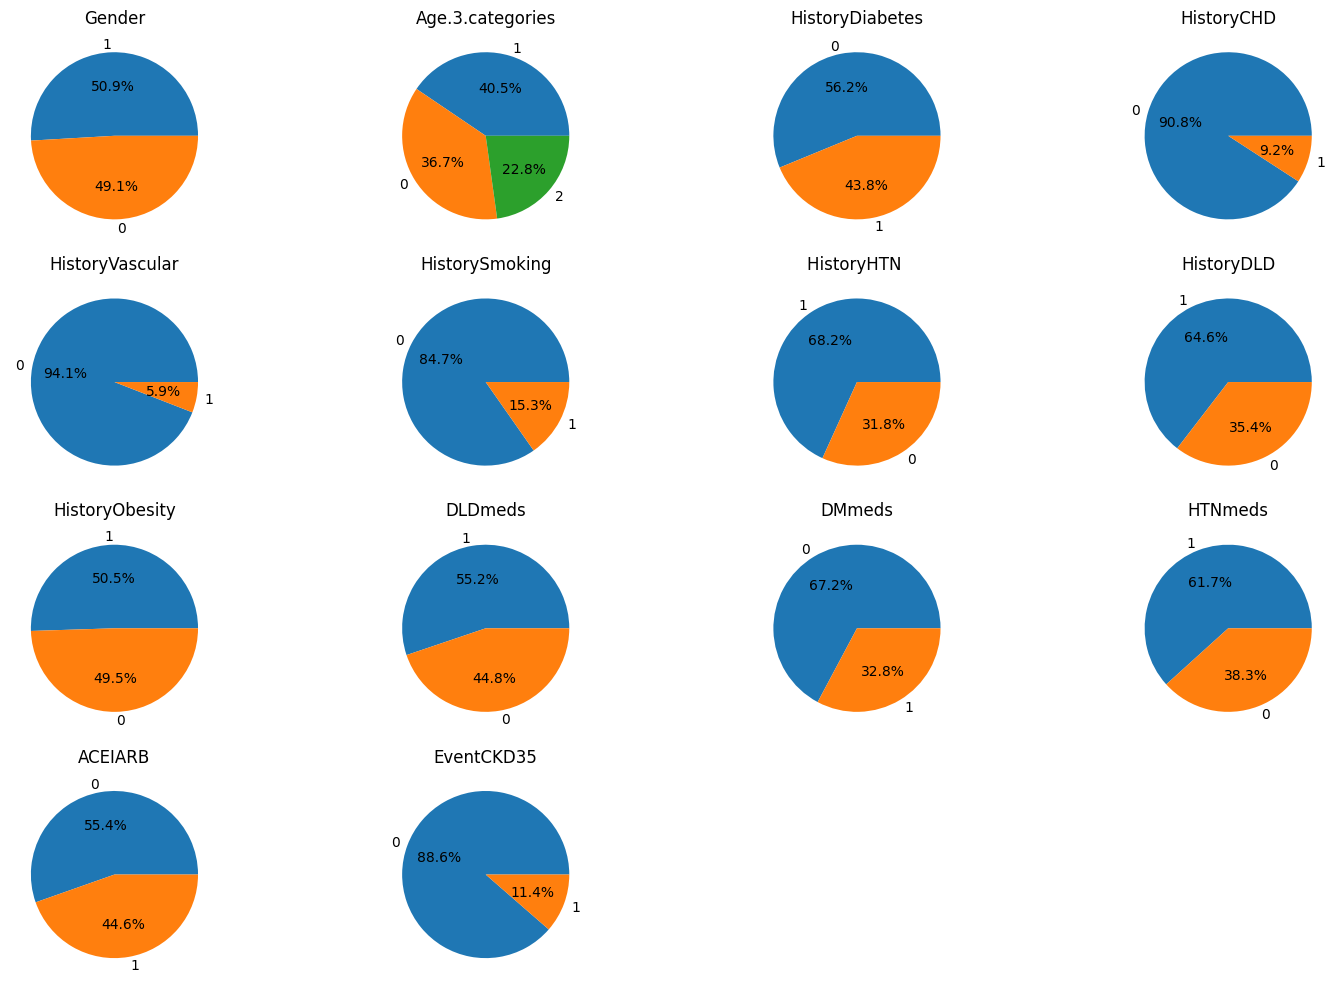

In [ ]:
## Plotting the distribution of categorical columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i+1)
    data[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

**Similarly, this plot illustrates the distribution of categorical values, showing the percentage of different values in each categorical column. It reveals that gender is evenly distributed (50-50). The age categories also exhibit a uniform distribution with approximately equal proportions. However, some columns, such as `HistoryCHD`, `HistoryVascular`, and `HistorySmoking`, display highly skewed distributions.**

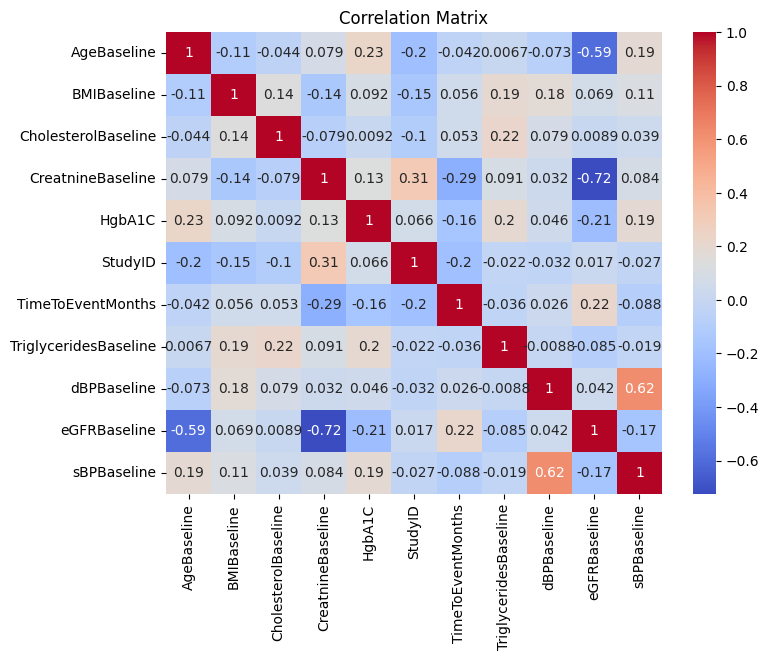

In [ ]:
## Plotting the correlation matrix for numerical columns

plt.figure(figsize=(8, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**The correlation matrix represents the correlations between the numerical features. We observe that there are no strong positive correlations. The highest positive correlation observed is between `dBPBaseline` and `sBPBaseline`, which is 0.62. Significant negative correlations include that between `eGFRBaseline` and `CreatnineBaseline`, which is -0.72. Additionally, there is a notable negative correlation of -0.59 between `AgeBaseline` and `eGFRBaseline`.**

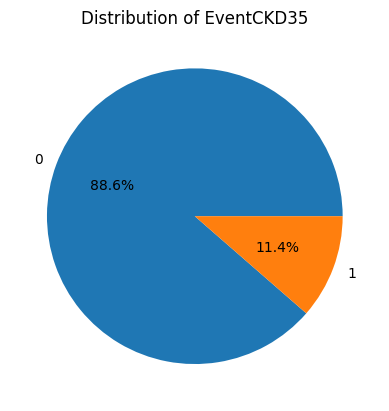

In [ ]:
## Distribution of the target variable

target = 'EventCKD35'
data[target].value_counts().plot.pie(autopct='%1.1f%%')
plt.title(f'Distribution of {target}')
plt.ylabel('')
plt.show()

**The pie chart above illustrates the distribution of the target variable, `EventCKD35`. It shows that 11.4% of values are 1, indicating presence of CKD35, while 88.6% of values are 0, indicating absence of CKD35. This highlights a significant imbalance in the dataset, which may need to be addressed before performing classification analysis. We will explore how this imbalanced distribution can affect the model and consider methods to improve model performance using a balanced dataset.**

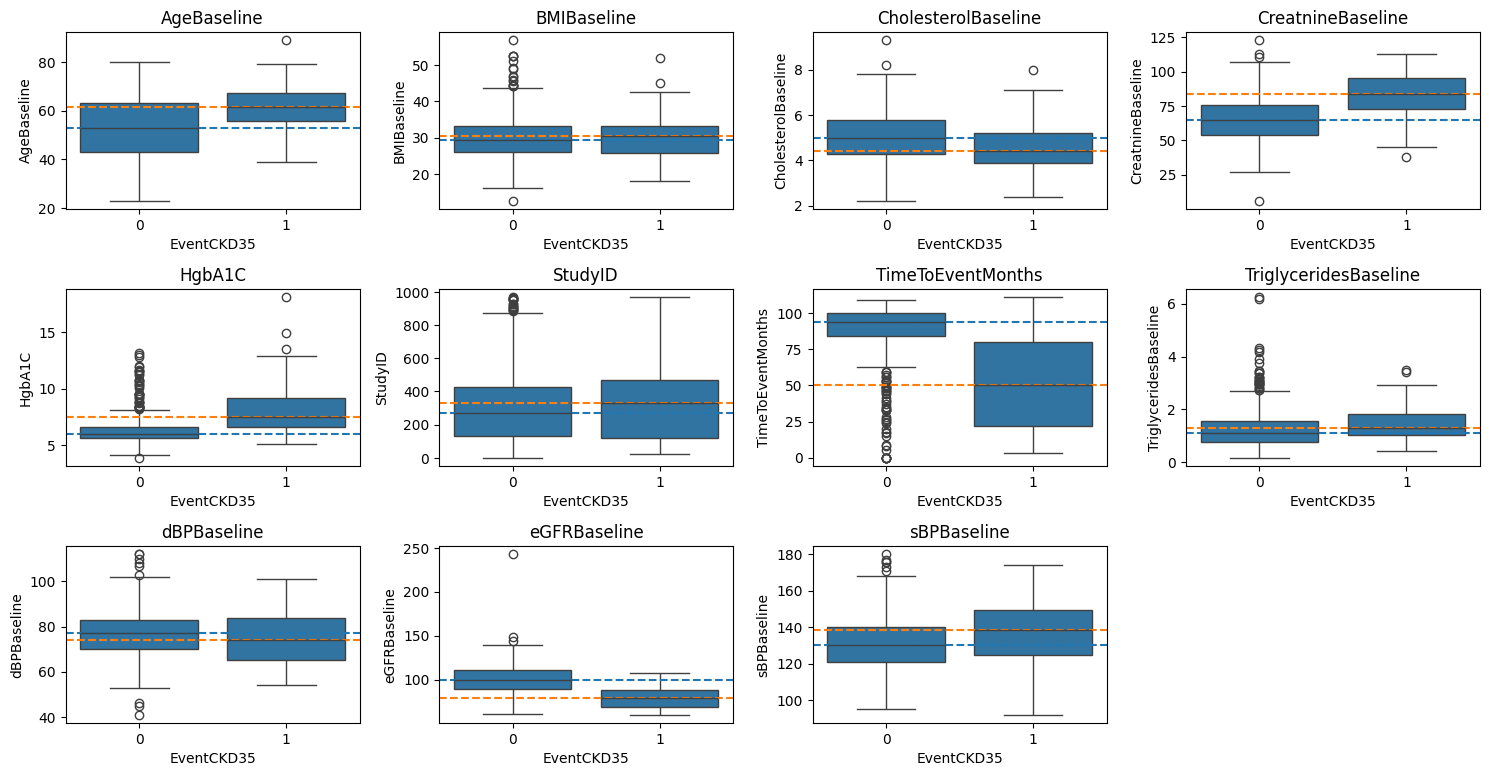

In [ ]:
## Difference of distribution of numerical columns based on the target variable

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=target, y=col, data=data)
    plt.title(col)
    ## adding median lines with same color as boxplot
    for j in range(2):
        line = plt.axhline(data[data[target] == j][col].median(), color=sns.color_palette()[j], linestyle='--', label=f'{target} = {j}')
plt.tight_layout()
plt.show()

**These subplots display the distribution of numerical columns when the class is 0 versus when the class is 1. We observe significant differences in some numerical values between the two classes, while others show minimal variation. For instance, columns like `TimeToEventMonths` and `CreatnineBaseline` exhibit notable differences between class values 0 and 1. Conversely, columns such as `TriglyceridesBaseline` and `dBPBaseline` show less variation across the classes.**

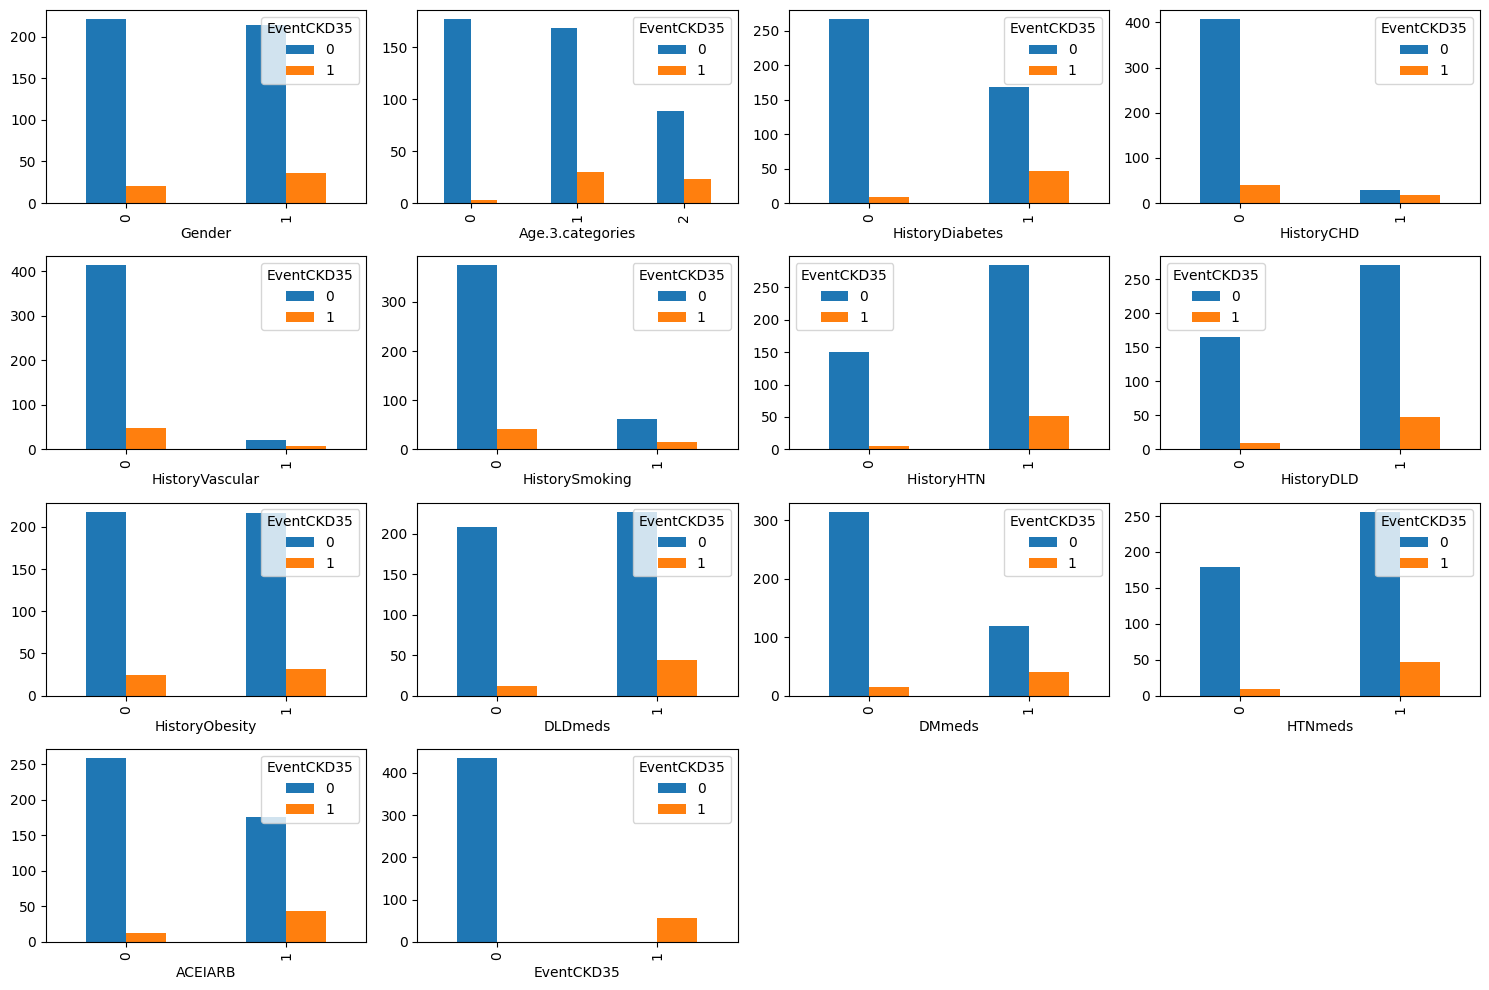

In [ ]:
## Difference of distribution of categorical columns based on the target variable

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i+1)
    pd.crosstab(data[col], data[target]).plot(kind='bar', stacked=False, ax=plt.gca())
    plt.ylabel('')
plt.tight_layout()
plt.show()

**Similarly, these subplots illustrate the distribution of categorical columns when the target variable CKD35 is 0 versus when it is 1. We observe similarities in behavior across both classes in many cases, but there are also noticeable differences. For example, columns such as `DLDmeds`, `HistoryDiabetes`, and `HistoryHTN` exhibit distinct variations between CKD35 values 0 and 1.**

### Data Preprocessing

In [ ]:
data.head()

,StudyID,Gender,AgeBaseline,Age.3.categories,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,DMmeds,HTNmeds,ACEIARB,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35
0,1,0,64,1,0,0,0,0,1,1,1,1,0,1,0,4.8,0.92,5.90,59.0,93.319050,144,87,40.161842,98,0
1,2,0,52,1,0,0,0,0,1,1,1,0,0,1,0,6.4,1.84,6.00,52.0,105.833836,148,91,44.536941,106,0
2,3,0,56,1,0,0,0,0,1,1,1,1,0,1,0,6.4,1.75,5.90,57.0,99.839823,149,86,40.543437,88,0
3,4,0,58,1,0,0,0,0,0,1,1,1,0,0,0,5.1,1.22,5.50,65.0,90.315159,116,68,32.025584,103,0
4,5,0,63,1,1,0,0,0,1,1,1,1,1,1,1,5.0,1.11,7.46,70.0,79.725199,132,63,30.757401,105,0


In [ ]:
## Defining the features and target variable

X = data.drop(['StudyID', 'EventCKD35'], axis=1)
y = data[target]

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (491, 23)
Target shape: (491,)


**Now we will start the data pre-processing. Before proceeding, we need to define the features and the target variable for the analysis. We have dropped `StudyID` because it will not impact the prediction. Additionally, `Event CKD35` has been removed from the features (X) as it is our target variable.

In [ ]:
## Encoding the categorical columns

# Convert the categorical columns to object type
cat_cols.remove('EventCKD35')
X[cat_cols] = X[cat_cols].astype('object')

X = pd.get_dummies(X, drop_first=True)
print(f'Features shape after encoding: {X.shape}')
X.head()

Features shape after encoding: (491, 24)


,AgeBaseline,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,Gender_1,Age.3.categories_1,Age.3.categories_2,HistoryDiabetes_1,HistoryCHD_1,HistoryVascular_1,HistorySmoking_1,HistoryHTN _1,HistoryDLD_1,HistoryObesity_1,DLDmeds_1,DMmeds_1,HTNmeds_1,ACEIARB_1
0,64,4.8,0.92,5.90,59.0,93.319050,144,87,40.161842,98,False,True,False,False,False,False,False,True,True,True,True,False,True,False
1,52,6.4,1.84,6.00,52.0,105.833836,148,91,44.536941,106,False,True,False,False,False,False,False,True,True,True,False,False,True,False
2,56,6.4,1.75,5.90,57.0,99.839823,149,86,40.543437,88,False,True,False,False,False,False,False,True,True,True,True,False,True,False
3,58,5.1,1.22,5.50,65.0,90.315159,116,68,32.025584,103,False,True,False,False,False,False,False,False,True,True,True,False,False,False
4,63,5.0,1.11,7.46,70.0,79.725199,132,63,30.757401,105,False,True,False,True,False,False,False,True,True,True,True,True,True,True


**After defining the features and target, we transform our categorical values into objects so that 0 and 1 are represented as classes rather than numerical values. Subsequently, we apply one-hot encoding to transform them into numerical format. This ensures each category has 491 records. Since many columns are binary, there is not a substantial increase in the number of columns, except for one column that had three values initially, resulting in an additional column after one-hot encoding. Thus, we now have 491 records and 24 columns.**

In [ ]:
## Scaling the numerical columns

# Remove StudyID column from numerical columns
num_cols = num_cols.drop('StudyID')

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print(f'Features shape after scaling: {X.shape}')
X.head()

Features shape after scaling: (491, 24)


,AgeBaseline,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,Gender_1,Age.3.categories_1,Age.3.categories_2,HistoryDiabetes_1,HistoryCHD_1,HistoryVascular_1,HistorySmoking_1,HistoryHTN _1,HistoryDLD_1,HistoryObesity_1,DLDmeds_1,DMmeds_1,HTNmeds_1,ACEIARB_1
0,0.781935,-0.162995,-0.498383,-0.403901,-0.494784,-0.259615,0.805353,0.946551,1.608310,0.574756,False,True,False,False,False,False,False,True,True,True,True,False,True,False
1,-0.087177,1.297413,0.669442,-0.344660,-0.885838,0.417475,1.060510,1.320375,2.313630,0.882630,False,True,False,False,False,False,False,True,True,True,False,False,True,False
2,0.202527,1.297413,0.555198,-0.403901,-0.606514,0.093180,1.124299,0.853095,1.669828,0.189913,False,True,False,False,False,False,False,True,True,True,True,False,True,False
3,0.347379,0.110832,-0.117571,-0.640866,-0.159596,-0.422135,-0.980741,-0.829113,0.296643,0.767177,False,True,False,False,False,False,False,False,True,True,True,False,False,False
4,0.709509,0.019556,-0.257202,0.520260,0.119728,-0.995085,0.039884,-1.296393,0.092196,0.844146,False,True,False,True,False,False,False,True,True,True,True,True,True,True


**As observed earlier, the ranges of each column were different. To ensure that no single column has a disproportionate impact on the model, we need to scale all variables. This process equalizes the influence of each column in the modeling process.**

## 2. FEATURE SELECTION

For feature selection, we will try two different approaches. The first one is mutual information and the other one is PCA.

In [ ]:
## Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Train: {X_train.shape} | Test: {X_test.shape}')

Train: (392, 24) | Test: (99, 24)


**Before proceeding with feature selection, we will split the dataset into training and testing sets. This ensures that every feature selection decision is influenced only by the training dataset and not by the test dataset.**

#### Mutual Information

**Mutual Information (MI) is a measure of the mutual dependence between two variables. In the context of feature selection, it quantifies the amount of information obtained about one variable through the other variable. It helps in identifying the relevance of a feature with respect to the target variable.**

**Mutual Information is calculated for each feature with the target variable, and features with higher MI values are considered more informative. MI is non-linear and can capture more complex relationships between features and the target variable compared to linear methods.**

**Advantages:**
- **Captures non-linear relationships.**
- **Easy to interpret and implement.**
- **Does not assume any particular distribution of data.**

**Disadvantages:**
- **Computationally intensive for large datasets.**
- **Requires discretization for continuous features, which may lead to information loss.**
- **Sensitive to noise in the data.**

Top 10 features: Index(['eGFRBaseline', 'TimeToEventMonths', 'HistoryDiabetes_1',
       'CreatnineBaseline', 'AgeBaseline', 'HgbA1C', 'DLDmeds_1', 'ACEIARB_1',
       'HistoryDLD_1', 'HTNmeds_1'],
      dtype='object')
Train: (392, 10) | Test: (99, 10)


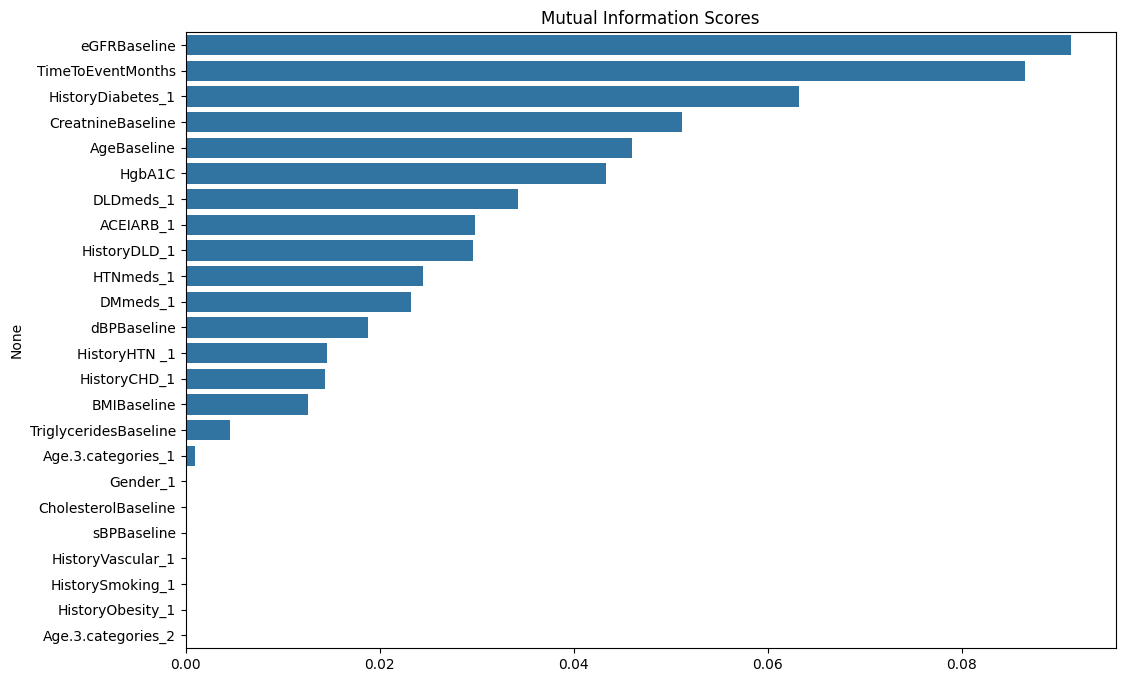

In [ ]:
## 2.1. Feature Selection using Mutual Information

# Mutual Information
mi = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

top_features = mi_scores.index[:10]
print(f'Top 10 features: {top_features}')

X_train_mi = X_train[top_features]
X_test_mi = X_test[top_features]

print(f'Train: {X_train_mi.shape} | Test: {X_test_mi.shape}')

# Plot Mutual Information Scores - Top 10 with different color, rest with same color
plt.figure(figsize=(12, 8))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title("Mutual Information Scores")
plt.show()

**For feature selection, we applied the Mutual Information Technique to identify the top 10 features with the highest Mutual Information Scores. Selected features include EGFR baseline, Time to Events Months, History Diabetes, Creatinine Baseline, and Age Baseline, among others.**

**Mutual Information Scores measure the amount of information obtained about one variable through another, capturing non-linear relationships and aiding in selecting relevant features for predictive modeling.**

**The plot above illustrates the Mutual Information Scores for the top 10 features. We observe that the top 10 features have scores ranging from 0.02 to 0.09.**

#### Principal Component Analysis (PCA)

**Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the features into a set of linearly uncorrelated components called principal components. These components are ordered such that the first few retain most of the variation present in the original features.**

**PCA projects the data onto a new coordinate system, where the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on. It helps in reducing the number of features while retaining the essential patterns in the data.**

**Advantages:**
- **Reduces dimensionality, which can improve model performance and reduce overfitting.**
- **Removes multicollinearity among features.**
- **Can handle large datasets efficiently.**

**Disadvantages:**
- **Loss of interpretability of transformed features.**
- **Assumes linear relationships between features.**
- **May discard useful information along with noise.**

Features shape after PCA: (392, 14) | (99, 14)


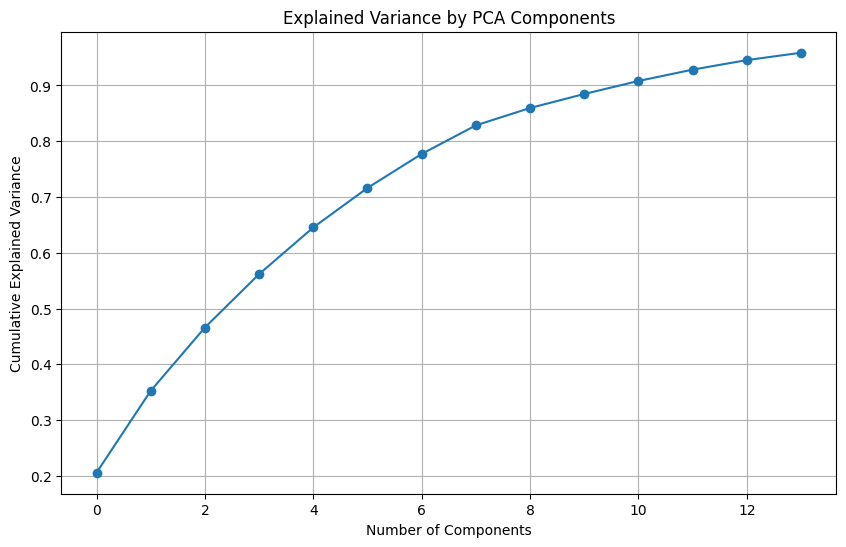

In [ ]:
## 2.2. PCA for feature selection

pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance
explained_variance = pca.explained_variance_ratio_

print(f'Features shape after PCA: {X_train_pca.shape} | {X_test_pca.shape}')

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

**For feature selection, we applied PCA independently on the raw dataset to reduce dimensionality, setting the explained variance threshold to 0.95. After feature reduction, the number of columns was reduced to 14.**

**PCA (Principal Component Analysis) works by transforming correlated variables into a set of orthogonal components that capture the maximum variance in the data. It reduces dimensionality while retaining most of the information, handling collinearity, and focusing on the most significant features.**

**The plot above illustrates the explained variance ratio increase as the number of components increases. We observe that the explained variance ratio reaches 0.95 with 14 components.**

## 3. HANDLING IMBALANCED DATASET

### Balancing Techniques

**To handle class imbalance, we will try two different approaches. The first one is oversampling and the other one is SMOTE.**


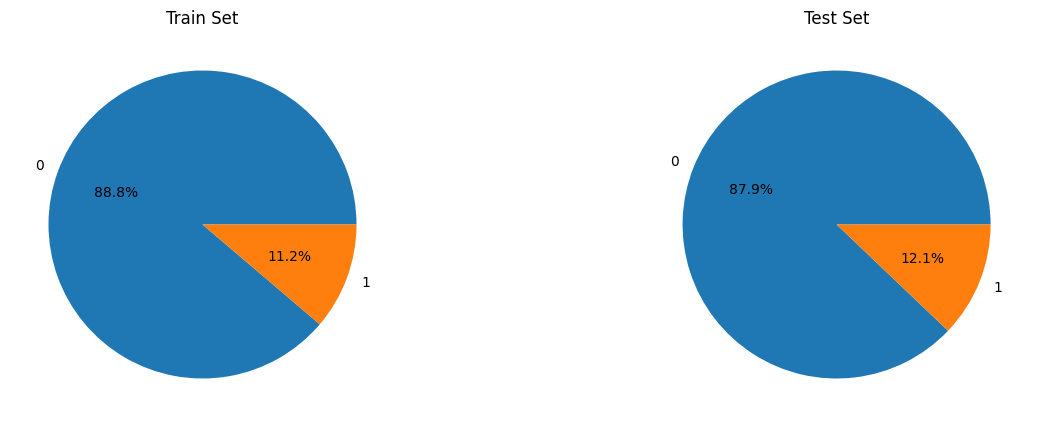

In [ ]:
## Plotting the distribution of the target variable

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
y_train.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Train Set')
plt.ylabel('')

plt.subplot(1, 2, 2)
y_test.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Test Set')
plt.ylabel('')
plt.show()

**This is a comparative analysis of the distribution of the target variable in the train set and the test set. By using `stratify=y` during splitting, we ensured that the distribution remains consistent between both datasets.**

#### Oversampling

**Oversampling is a technique used to balance the class distribution by replicating instances of the minority class. This increases the number of samples in the minority class to match the majority class, thereby addressing the imbalance.**

**Oversampling involves randomly duplicating examples from the minority class to increase its representation in the dataset. This technique is simple and can be effective in improving model performance on imbalanced datasets.**

**Advantages:**
- **Easy to implement and understand.**
- **Increases the representation of the minority class.**
- **Can be combined with other techniques to improve performance.**

**Disadvantages:**
- **Risk of overfitting due to duplication of minority class instances.**
- **Does not introduce any new information to the dataset.**
- **May increase training time due to the larger dataset size.**

Balanced Train: MI - (696, 10) | PCA - (696, 14)


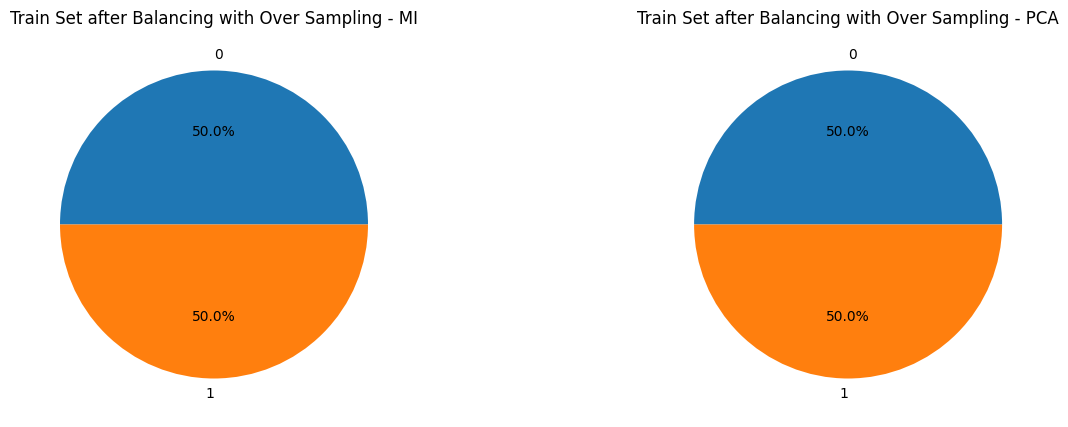

In [ ]:
## Balancing the dataset - Over Sampling

ros = RandomOverSampler(random_state=42)
X_train_mi_ros, y_train_mi_ros = ros.fit_resample(X_train_mi, y_train)

ros = RandomOverSampler(random_state=42)
X_train_pca_ros, y_train_pca_ros = ros.fit_resample(X_train_pca, y_train)

print(f'Balanced Train: MI - {X_train_mi_ros.shape} | PCA - {X_train_pca_ros.shape}')

# Plotting the distribution of the target variable after balancing

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.Series(y_train_mi_ros).value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Train Set after Balancing with Over Sampling - MI')
plt.ylabel('')

plt.subplot(1, 2, 2)
pd.Series(y_train_pca_ros).value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Train Set after Balancing with Over Sampling - PCA')
plt.ylabel('')
plt.show()

#### Synthetic Minority Over-sampling Technique (SMOTE)

**SMOTE is an advanced oversampling technique that generates synthetic samples for the minority class. It creates new instances by interpolating between existing minority class instances, thus adding new, plausible data points to the dataset.**

**SMOTE works by selecting two or more similar instances from the minority class and creating synthetic samples along the line segments joining these instances. This technique helps in balancing the class distribution while introducing variability in the synthetic samples, reducing the risk of overfitting.**

**Advantages:**
- **Reduces overfitting compared to simple oversampling.**
- **Generates new, diverse samples for the minority class.**
- **Improves model performance on imbalanced datasets.**

**Disadvantages:**
- **Can create overlapping between classes, leading to class ambiguity.**
- **More complex and computationally intensive than simple oversampling.**
- **May introduce noise if not properly tuned.**

Balanced Train: MI - (696, 10) | PCA - (696, 14)


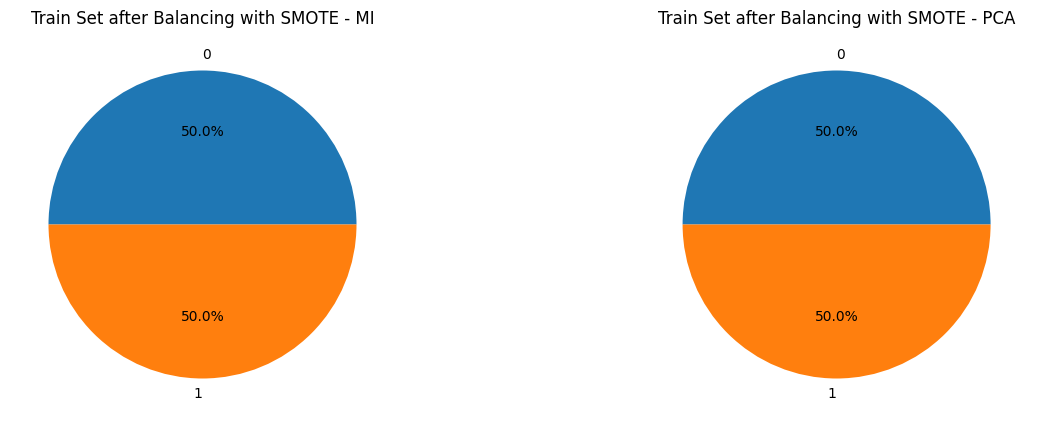

In [ ]:
## Balancing the dataset - SMOTE

smote = SMOTE(random_state=42)
X_train_mi_smote, y_train_mi_smote = smote.fit_resample(X_train_mi, y_train)

smote = SMOTE(random_state=42)
X_train_pca_smote, y_train_pca_smote = smote.fit_resample(X_train_pca, y_train)

print(f'Balanced Train: MI - {X_train_mi_smote.shape} | PCA - {X_train_pca_smote.shape}')

# Plotting the distribution of the target variable after balancing

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
pd.Series(y_train_mi_smote).value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Train Set after Balancing with SMOTE - MI')
plt.ylabel('')

plt.subplot(1, 2, 2)
pd.Series(y_train_pca_smote).value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Train Set after Balancing with SMOTE - PCA')
plt.ylabel('')
plt.show()

**Next, we utilized SMOTE as a balancing technique, which increased the number of records to match the same count achieved with oversampling. SMOTE generates synthetic samples for the minority class by selecting similar instances in the feature space and creating new samples along lines drawn between them.**

## 4. MODEL TRAINING AND EVALUATION

In [ ]:
## DataFrame to store the results

results = pd.DataFrame(columns=['Model', 'Feature Selection', 'Balancing', 'Train Accuracy', 'Test Accuracy',
                                'Train F1 Score', 'Test F1 Score', 'Test Precision', 'Test Recall', 'Test ROC AUC'])

**Now, with the balanced data and various data variants, we can begin evaluating different models and dataset versions. We have created a DataFrame to hold the performance metrics for each model, feature selection technique, and balancing technique.**

In [ ]:
## function to search for the best hyperparameters

def search_best_hyperparameters(model, params, X_train, y_train):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print(f'Best Parameters: {grid.best_params_}')
    print(f'Best Score: {np.round(grid.best_score_, 2)}')
    print(f'Best Estimator: {grid.best_estimator_}')
    return grid.best_estimator_

**This function helps us find the best combination or optimal parameters for a particular model using GridSearch.**

**GridSearch is a technique that performs an exhaustive search over a predefined parameter grid, training the model for each combination of hyperparameters and evaluating performance using cross-validation to identify the optimal set.**

In [ ]:
## Logistic Regression - Hyperparameter Tuning on different datasets

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

print('Logistic Regression - Using all features')
lr1 = LogisticRegression(random_state=42)
lr1_best = search_best_hyperparameters(lr1, params, X_train, y_train)

print('\nLogistic Regression - Using MI features')
lr2 = LogisticRegression(random_state=42)
lr2_best = search_best_hyperparameters(lr2, params, X_train_mi, y_train)

print('\nLogistic Regression - Using PCA features')
lr3 = LogisticRegression(random_state=42)
lr3_best = search_best_hyperparameters(lr3, params, X_train_pca, y_train)

print('\nLogistic Regression - Using Over Sampling with MI features')
lr4 = LogisticRegression(random_state=42)
lr4_best = search_best_hyperparameters(lr4, params, X_train_mi_ros, y_train_mi_ros)

print('\nLogistic Regression - Using Over Sampling with PCA features')
lr5 = LogisticRegression(random_state=42)
lr5_best = search_best_hyperparameters(lr5, params, X_train_pca_ros, y_train_pca_ros)

print('\nLogistic Regression - Using SMOTE with MI features')
lr6 = LogisticRegression(random_state=42)
lr6_best = search_best_hyperparameters(lr6, params, X_train_mi_smote, y_train_mi_smote)

print('\nLogistic Regression - Using SMOTE with PCA features')
lr7 = LogisticRegression(random_state=42)
lr7_best = search_best_hyperparameters(lr7, params, X_train_pca_smote, y_train_pca_smote)

Logistic Regression - Using all features
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.92
Best Estimator: LogisticRegression(C=0.1, random_state=42)

Logistic Regression - Using MI features
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.92
Best Estimator: LogisticRegression(C=10, random_state=42)

Logistic Regression - Using PCA features
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.92
Best Estimator: LogisticRegression(C=1, random_state=42)

Logistic Regression - Using Over Sampling with MI features
Best Parameters: {'C': 1, 'penalty': 'l2'}
Best Score: 0.86
Best Estimator: LogisticRegression(C=1, random_state=42)

Logistic Regression - Using Over Sampling with PCA features
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best Score: 0.87
Best Estimator: LogisticRegression(C=0.1, random_state=42)

Logistic Regression - Using SMOTE with MI features
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.88
Best Estimator: LogisticRegression(C=10, random

**Optimal combinations of hyperparameters were searched for logistic regression across all dataset variants. First, we tried logistic regression with all features, then used only the selected features from the MI technique, followed by the features obtained through PCA. We also evaluated oversampled and SMOTE variants of the dataset for both PCA and MI features. The scores and best parameters for all seven variants of logistic regression are displayed above.**

In [ ]:
## function to evaluate the model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)

    test_roc_auc = roc_auc_score(y_test, y_test_pred)

    return train_accuracy, test_accuracy, train_f1, test_f1, test_precision, test_recall, test_roc_auc

In [ ]:
## Logistic Regression - Training and Testing Optimal Models on different datasets

results.loc[len(results)] = ['Logistic Regression', 'All Features', 'No Balancing'] + list(evaluate_model(lr1_best, X_train, y_train, X_test, y_test))
results.loc[len(results)] = ['Logistic Regression', 'MI Features', 'No Balancing'] + list(evaluate_model(lr2_best, X_train_mi, y_train, X_test_mi, y_test))
results.loc[len(results)] = ['Logistic Regression', 'PCA Features', 'No Balancing'] + list(evaluate_model(lr3_best, X_train_pca, y_train, X_test_pca, y_test))
results.loc[len(results)] = ['Logistic Regression', 'MI Features', 'Over Sampling'] + list(evaluate_model(lr4_best, X_train_mi_ros, y_train_mi_ros, X_test_mi, y_test))
results.loc[len(results)] = ['Logistic Regression', 'PCA Features', 'Over Sampling'] + list(evaluate_model(lr5_best, X_train_pca_ros, y_train_pca_ros, X_test_pca, y_test))
results.loc[len(results)] = ['Logistic Regression', 'MI Features', 'SMOTE'] + list(evaluate_model(lr6_best, X_train_mi_smote, y_train_mi_smote, X_test_mi, y_test))
results.loc[len(results)] = ['Logistic Regression', 'PCA Features', 'SMOTE'] + list(evaluate_model(lr7_best, X_train_pca_smote, y_train_pca_smote, X_test_pca, y_test))

results[results['Model'] == 'Logistic Regression']

,Model,Feature Selection,Balancing,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
0,Logistic Regression,All Features,No Balancing,0.933673,0.919192,0.628571,0.555556,0.833333,0.416667,0.702586
1,Logistic Regression,MI Features,No Balancing,0.926020,0.939394,0.591549,0.700000,0.875000,0.583333,0.785920
2,Logistic Regression,PCA Features,No Balancing,0.931122,0.919192,0.649351,0.600000,0.750000,0.500000,0.738506
3,Logistic Regression,MI Features,Over Sampling,0.857759,0.808081,0.857963,0.486486,0.360000,0.750000,0.783046
4,Logistic Regression,PCA Features,Over Sampling,0.880747,0.848485,0.883263,0.545455,0.428571,0.750000,0.806034
5,Logistic Regression,MI Features,SMOTE,0.889368,0.848485,0.892308,0.571429,0.434783,0.833333,0.841954
6,Logistic Regression,PCA Features,SMOTE,0.883621,0.858586,0.885755,0.562500,0.450000,0.750000,0.811782


**All optimal variants were evaluated on the test data, and the results are displayed in the table above.**

In [ ]:
## K-Nearest Neighbors - Hyperparameter Tuning on different datasets

params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

print('K-Nearest Neighbors - Using all features')
knn1 = KNeighborsClassifier()
knn1_best = search_best_hyperparameters(knn1, params, X_train, y_train)

print('\nK-Nearest Neighbors - Using MI features')
knn2 = KNeighborsClassifier()
knn2_best = search_best_hyperparameters(knn2, params, X_train_mi, y_train)

print('\nK-Nearest Neighbors - Using PCA features')
knn3 = KNeighborsClassifier()
knn3_best = search_best_hyperparameters(knn3, params, X_train_pca, y_train)

print('\nK-Nearest Neighbors - Using Over Sampling with MI features')
knn4 = KNeighborsClassifier()
knn4_best = search_best_hyperparameters(knn4, params, X_train_mi_ros, y_train_mi_ros)

print('\nK-Nearest Neighbors - Using Over Sampling with PCA features')
knn5 = KNeighborsClassifier()
knn5_best = search_best_hyperparameters(knn5, params, X_train_pca_ros, y_train_pca_ros)

print('\nK-Nearest Neighbors - Using SMOTE with MI features')
knn6 = KNeighborsClassifier()
knn6_best = search_best_hyperparameters(knn6, params, X_train_mi_smote, y_train_mi_smote)

print('\nK-Nearest Neighbors - Using SMOTE with PCA features')
knn7 = KNeighborsClassifier()
knn7_best = search_best_hyperparameters(knn7, params, X_train_pca_smote, y_train_pca_smote)

K-Nearest Neighbors - Using all features
Best Parameters: {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Score: 0.91
Best Estimator: KNeighborsClassifier(n_neighbors=9)

K-Nearest Neighbors - Using MI features
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best Score: 0.92
Best Estimator: KNeighborsClassifier(n_neighbors=9, p=1)

K-Nearest Neighbors - Using PCA features
Best Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Score: 0.91
Best Estimator: KNeighborsClassifier(n_neighbors=11, p=1)

K-Nearest Neighbors - Using Over Sampling with MI features
Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score: 0.93
Best Estimator: KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

K-Nearest Neighbors - Using Over Sampling with PCA features
Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Score: 0.95
Best Estimator: KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbors - Using SMOTE with MI

In [ ]:
## K-Nearest Neighbors - Training and Testing Optimal Models on different datasets

results.loc[len(results)] = ['K-Nearest Neighbors', 'All Features', 'No Balancing'] + list(evaluate_model(knn1_best, X_train, y_train, X_test, y_test))
results.loc[len(results)] = ['K-Nearest Neighbors', 'MI Features', 'No Balancing'] + list(evaluate_model(knn2_best, X_train_mi, y_train, X_test_mi, y_test))
results.loc[len(results)] = ['K-Nearest Neighbors', 'PCA Features', 'No Balancing'] + list(evaluate_model(knn3_best, X_train_pca, y_train, X_test_pca, y_test))
results.loc[len(results)] = ['K-Nearest Neighbors', 'MI Features', 'Over Sampling'] + list(evaluate_model(knn4_best, X_train_mi_ros, y_train_mi_ros, X_test_mi, y_test))
results.loc[len(results)] = ['K-Nearest Neighbors', 'PCA Features', 'Over Sampling'] + list(evaluate_model(knn5_best, X_train_pca_ros, y_train_pca_ros, X_test_pca, y_test))
results.loc[len(results)] = ['K-Nearest Neighbors', 'MI Features', 'SMOTE'] + list(evaluate_model(knn6_best, X_train_mi_smote, y_train_mi_smote, X_test_mi, y_test))
results.loc[len(results)] = ['K-Nearest Neighbors', 'PCA Features', 'SMOTE'] + list(evaluate_model(knn7_best, X_train_pca_smote, y_train_pca_smote, X_test_pca, y_test))

results[results['Model'] == 'K-Nearest Neighbors']

,Model,Feature Selection,Balancing,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
7,K-Nearest Neighbors,All Features,No Balancing,0.915816,0.909091,0.521739,0.571429,0.666667,0.500000,0.732759
8,K-Nearest Neighbors,MI Features,No Balancing,0.931122,0.919192,0.640000,0.555556,0.833333,0.416667,0.702586
9,K-Nearest Neighbors,PCA Features,No Balancing,0.913265,0.929293,0.468750,0.631579,0.857143,0.500000,0.744253
10,K-Nearest Neighbors,MI Features,Over Sampling,1.000000,0.868687,1.000000,0.551724,0.470588,0.666667,0.781609
11,K-Nearest Neighbors,PCA Features,Over Sampling,0.978448,0.818182,0.978903,0.470588,0.363636,0.666667,0.752874
12,K-Nearest Neighbors,MI Features,SMOTE,1.000000,0.868687,1.000000,0.580645,0.473684,0.750000,0.817529
13,K-Nearest Neighbors,PCA Features,SMOTE,0.959770,0.757576,0.961326,0.400000,0.285714,0.666667,0.718391


**Similarly, for KNN, the optimal hyperparameters were first identified. The models were then trained and tested with these optimal hyperparameters across all seven variants of the training and test datasets.**

In [ ]:
## Decision Tree - Hyperparameter Tuning on different datasets

params = {'max_depth': [3, 5, 7, 9, 11], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]}

print('Decision Tree - Using all features')
dt1 = DecisionTreeClassifier(random_state=42)
dt1_best = search_best_hyperparameters(dt1, params, X_train, y_train)

print('\nDecision Tree - Using MI features')
dt2 = DecisionTreeClassifier(random_state=42)
dt2_best = search_best_hyperparameters(dt2, params, X_train_mi, y_train)

print('\nDecision Tree - Using PCA features')
dt3 = DecisionTreeClassifier(random_state=42)
dt3_best = search_best_hyperparameters(dt3, params, X_train_pca, y_train)

print('\nDecision Tree - Using Over Sampling with MI features')
dt4 = DecisionTreeClassifier(random_state=42)
dt4_best = search_best_hyperparameters(dt4, params, X_train_mi_ros, y_train_mi_ros)

print('\nDecision Tree - Using Over Sampling with PCA features')
dt5 = DecisionTreeClassifier(random_state=42)
dt5_best = search_best_hyperparameters(dt5, params, X_train_pca_ros, y_train_pca_ros)

print('\nDecision Tree - Using SMOTE with MI features')
dt6 = DecisionTreeClassifier(random_state=42)
dt6_best = search_best_hyperparameters(dt6, params, X_train_mi_smote, y_train_mi_smote)

print('\nDecision Tree - Using SMOTE with PCA features')
dt7 = DecisionTreeClassifier(random_state=42)
dt7_best = search_best_hyperparameters(dt7, params, X_train_pca_smote, y_train_pca_smote)

Decision Tree - Using all features
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score: 0.89
Best Estimator: DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

Decision Tree - Using MI features
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.91
Best Estimator: DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, random_state=42)

Decision Tree - Using PCA features
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score: 0.89
Best Estimator: DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

Decision Tree - Using Over Sampling with MI features
Best Parameters: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.96
Best Estimator: DecisionTreeClassifier(max_depth=11, random_state=42)

Decision Tree - Using Over Sampling with PCA features
Best Parameters: {'max_depth': 11, 'min_samples_leaf': 

In [ ]:
## Decision Tree - Training and Testing Optimal Models on different datasets

results.loc[len(results)] = ['Decision Tree', 'All Features', 'No Balancing'] + list(evaluate_model(dt1_best, X_train, y_train, X_test, y_test))
results.loc[len(results)] = ['Decision Tree', 'MI Features', 'No Balancing'] + list(evaluate_model(dt2_best, X_train_mi, y_train, X_test_mi, y_test))
results.loc[len(results)] = ['Decision Tree', 'PCA Features', 'No Balancing'] + list(evaluate_model(dt3_best, X_train_pca, y_train, X_test_pca, y_test))
results.loc[len(results)] = ['Decision Tree', 'MI Features', 'Over Sampling'] + list(evaluate_model(dt4_best, X_train_mi_ros, y_train_mi_ros, X_test_mi, y_test))
results.loc[len(results)] = ['Decision Tree', 'PCA Features', 'Over Sampling'] + list(evaluate_model(dt5_best, X_train_pca_ros, y_train_pca_ros, X_test_pca, y_test))
results.loc[len(results)] = ['Decision Tree', 'MI Features', 'SMOTE'] + list(evaluate_model(dt6_best, X_train_mi_smote, y_train_mi_smote, X_test_mi, y_test))
results.loc[len(results)] = ['Decision Tree', 'PCA Features', 'SMOTE'] + list(evaluate_model(dt7_best, X_train_pca_smote, y_train_pca_smote, X_test_pca, y_test))

results[results['Model'] == 'Decision Tree']

,Model,Feature Selection,Balancing,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
14,Decision Tree,All Features,No Balancing,0.926020,0.909091,0.567164,0.526316,0.714286,0.416667,0.696839
15,Decision Tree,MI Features,No Balancing,0.926020,0.909091,0.567164,0.526316,0.714286,0.416667,0.696839
16,Decision Tree,PCA Features,No Balancing,0.956633,0.919192,0.795181,0.636364,0.700000,0.583333,0.774425
17,Decision Tree,MI Features,Over Sampling,1.000000,0.858586,1.000000,0.363636,0.400000,0.333333,0.632184
18,Decision Tree,PCA Features,Over Sampling,0.985632,0.898990,0.985836,0.545455,0.600000,0.500000,0.727011
19,Decision Tree,MI Features,SMOTE,0.984195,0.909091,0.984397,0.640000,0.615385,0.666667,0.804598
20,Decision Tree,PCA Features,SMOTE,0.979885,0.828283,0.980282,0.370370,0.333333,0.416667,0.650862


**The third model was DecisionTree, which was optimized based on `max_depth`, `min_samples_split`, and `min_samples_leaf`. The model was then trained and tested with these optimized parameters.**

In [ ]:
## Random Forest - Hyperparameter Tuning on different datasets

params = {'n_estimators': [100, 250, 500], 'max_depth': [3, 5, 8], 'min_samples_split': [2, 5, 10]}

print('Random Forest - Using all features')
rf1 = RandomForestClassifier(random_state=42)
rf1_best = search_best_hyperparameters(rf1, params, X_train, y_train)

print('\nRandom Forest - Using MI features')
rf2 = RandomForestClassifier(random_state=42)
rf2_best = search_best_hyperparameters(rf2, params, X_train_mi, y_train)

print('\nRandom Forest - Using PCA features')
rf3 = RandomForestClassifier(random_state=42)
rf3_best = search_best_hyperparameters(rf3, params, X_train_pca, y_train)

print('\nRandom Forest - Using Over Sampling with MI features')
rf4 = RandomForestClassifier(random_state=42)
rf4_best = search_best_hyperparameters(rf4, params, X_train_mi_ros, y_train_mi_ros)

print('\nRandom Forest - Using Over Sampling with PCA features')
rf5 = RandomForestClassifier(random_state=42)
rf5_best = search_best_hyperparameters(rf5, params, X_train_pca_ros, y_train_pca_ros)

print('\nRandom Forest - Using SMOTE with MI features')
rf6 = RandomForestClassifier(random_state=42)
rf6_best = search_best_hyperparameters(rf6, params, X_train_mi_smote, y_train_mi_smote)

print('\nRandom Forest - Using SMOTE with PCA features')
rf7 = RandomForestClassifier(random_state=42)
rf7_best = search_best_hyperparameters(rf7, params, X_train_pca_smote, y_train_pca_smote)

Random Forest - Using all features
Best Parameters: {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 500}
Best Score: 0.92
Best Estimator: RandomForestClassifier(max_depth=8, min_samples_split=5, n_estimators=500,
                       random_state=42)

Random Forest - Using MI features
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.92
Best Estimator: RandomForestClassifier(max_depth=5, random_state=42)

Random Forest - Using PCA features
Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9
Best Estimator: RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=42)

Random Forest - Using Over Sampling with MI features
Best Parameters: {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 250}
Best Score: 0.97
Best Estimator: RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=250,
                       random_state=42)

Random Forest - Using Over Sampli

In [ ]:
## Random Forest - Training and Testing Optimal Models on different datasets

results.loc[len(results)] = ['Random Forest', 'All Features', 'No Balancing'] + list(evaluate_model(rf1_best, X_train, y_train, X_test, y_test))
results.loc[len(results)] = ['Random Forest', 'MI Features', 'No Balancing'] + list(evaluate_model(rf2_best, X_train_mi, y_train, X_test_mi, y_test))
results.loc[len(results)] = ['Random Forest', 'PCA Features', 'No Balancing'] + list(evaluate_model(rf3_best, X_train_pca, y_train, X_test_pca, y_test))
results.loc[len(results)] = ['Random Forest', 'MI Features', 'Over Sampling'] + list(evaluate_model(rf4_best, X_train_mi_ros, y_train_mi_ros, X_test_mi, y_test))
results.loc[len(results)] = ['Random Forest', 'PCA Features', 'Over Sampling'] + list(evaluate_model(rf5_best, X_train_pca_ros, y_train_pca_ros, X_test_pca, y_test))
results.loc[len(results)] = ['Random Forest', 'MI Features', 'SMOTE'] + list(evaluate_model(rf6_best, X_train_mi_smote, y_train_mi_smote, X_test_mi, y_test))
results.loc[len(results)] = ['Random Forest', 'PCA Features', 'SMOTE'] + list(evaluate_model(rf7_best, X_train_pca_smote, y_train_pca_smote, X_test_pca, y_test))

results[results['Model'] == 'Random Forest']

,Model,Feature Selection,Balancing,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
21,Random Forest,All Features,No Balancing,0.989796,0.929293,0.952381,0.631579,0.857143,0.500000,0.744253
22,Random Forest,MI Features,No Balancing,0.946429,0.919192,0.712329,0.600000,0.750000,0.500000,0.738506
23,Random Forest,PCA Features,No Balancing,0.951531,0.929293,0.724638,0.588235,1.000000,0.416667,0.708333
24,Random Forest,MI Features,Over Sampling,0.978448,0.909091,0.978903,0.608696,0.636364,0.583333,0.768678
25,Random Forest,PCA Features,Over Sampling,1.000000,0.939394,1.000000,0.666667,1.000000,0.500000,0.750000
26,Random Forest,MI Features,SMOTE,0.982759,0.898990,0.983051,0.545455,0.600000,0.500000,0.727011
27,Random Forest,PCA Features,SMOTE,0.995690,0.939394,0.995708,0.727273,0.800000,0.666667,0.821839


**The same process was applied to Random Forest, optimizing hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_split`.**

In [ ]:
## Results

results.to_csv('results.csv', index=False)
results

,Model,Feature Selection,Balancing,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall,Test ROC AUC
0,Logistic Regression,All Features,No Balancing,0.933673,0.919192,0.628571,0.555556,0.833333,0.416667,0.702586
1,Logistic Regression,MI Features,No Balancing,0.926020,0.939394,0.591549,0.700000,0.875000,0.583333,0.785920
2,Logistic Regression,PCA Features,No Balancing,0.931122,0.919192,0.649351,0.600000,0.750000,0.500000,0.738506
3,Logistic Regression,MI Features,Over Sampling,0.857759,0.808081,0.857963,0.486486,0.360000,0.750000,0.783046
4,Logistic Regression,PCA Features,Over Sampling,0.880747,0.848485,0.883263,0.545455,0.428571,0.750000,0.806034
5,Logistic Regression,MI Features,SMOTE,0.889368,0.848485,0.892308,0.571429,0.434783,0.833333,0.841954
6,Logistic Regression,PCA Features,SMOTE,0.883621,0.858586,0.885755,0.562500,0.450000,0.750000,0.811782
7,K-Nearest Neighbors,All Features,No Balancing,0.915816,0.909091,0.521739,0.571429,0.666667,0.500000,0.732759
8,K-Nearest Neighbors,MI Features,No Balancing,0.931122,0.919192,0.640000,0.555556,0.833333,0.416667,0.702586
9,K-Nearest Neighbors,PCA Features,No Balancing,0.913265,0.929293,0.468750,0.631579,0.857143,0.500000,0.744253


**The table above comprehensively compares different models, feature selection techniques, and balancing techniques. It includes training accuracy, test accuracy, training F1 score, test F1 score, test precision, test recall, and test ROC AUC scores. We will now visually represent this data to obtain a clearer understanding and comparison.**

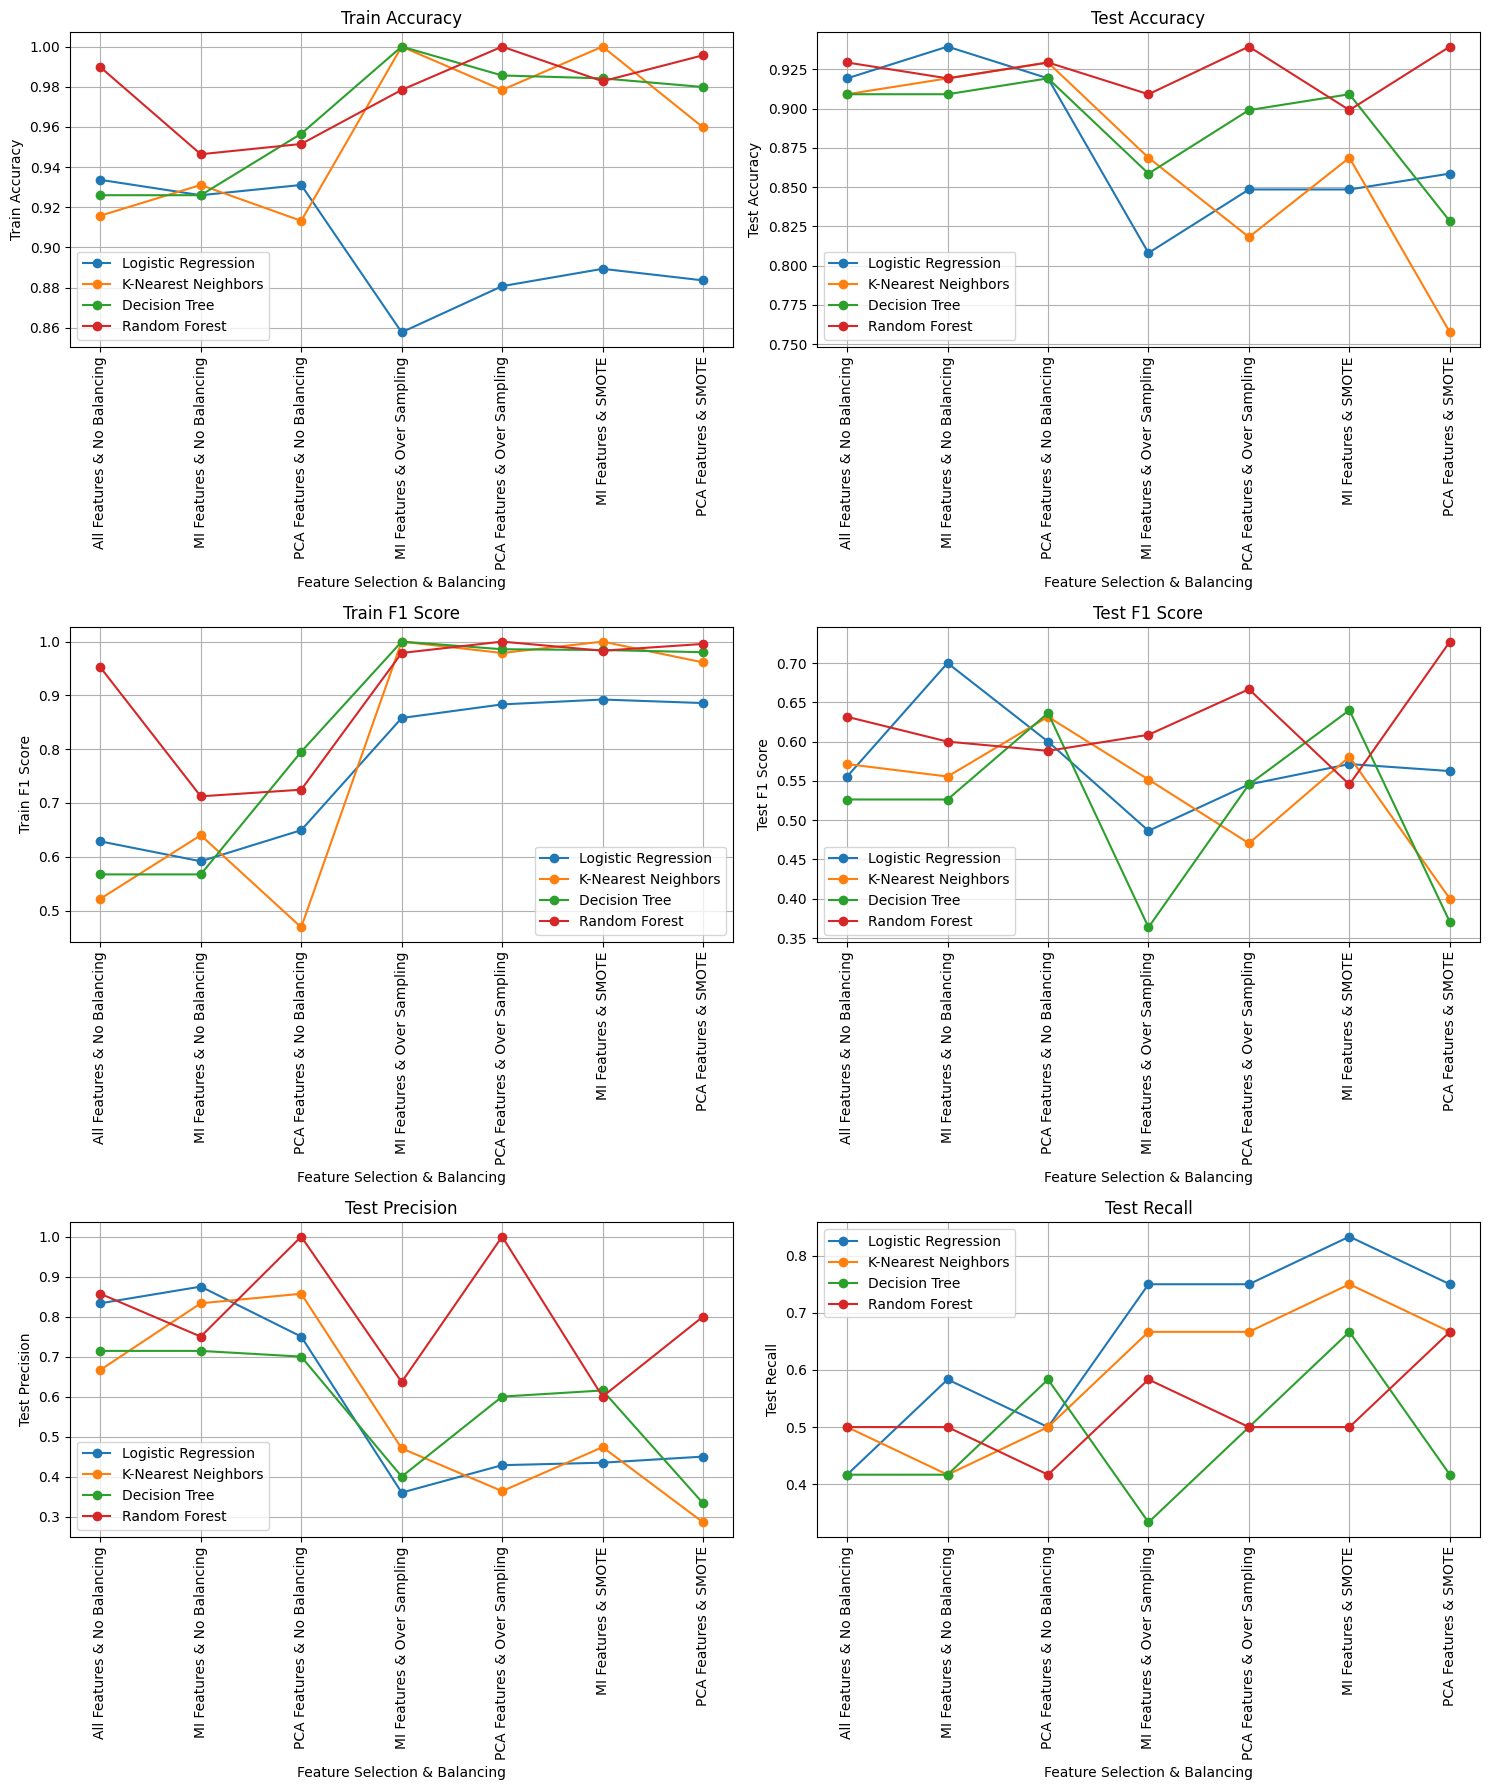

In [ ]:
## Plotting the evaluation metrics to compare the models

# Create subplots for each performance metric
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score', 'Test Precision', 'Test Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for model in results['Model'].unique():
        model_data = results[results['Model'] == model]
        ax.plot(model_data['Feature Selection'] + " & " + model_data['Balancing'], model_data[metric], label=model, marker='o')

    ax.set_title(metric)
    ax.set_xlabel('Feature Selection & Balancing')
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


**The charts above display all the metrics, including train accuracy, test accuracy, train F1 score, test F1 score, test precision, and test recall, for all models across all dataset variants. This visualization helps us choose the optimal model for our machine learning implementation.**

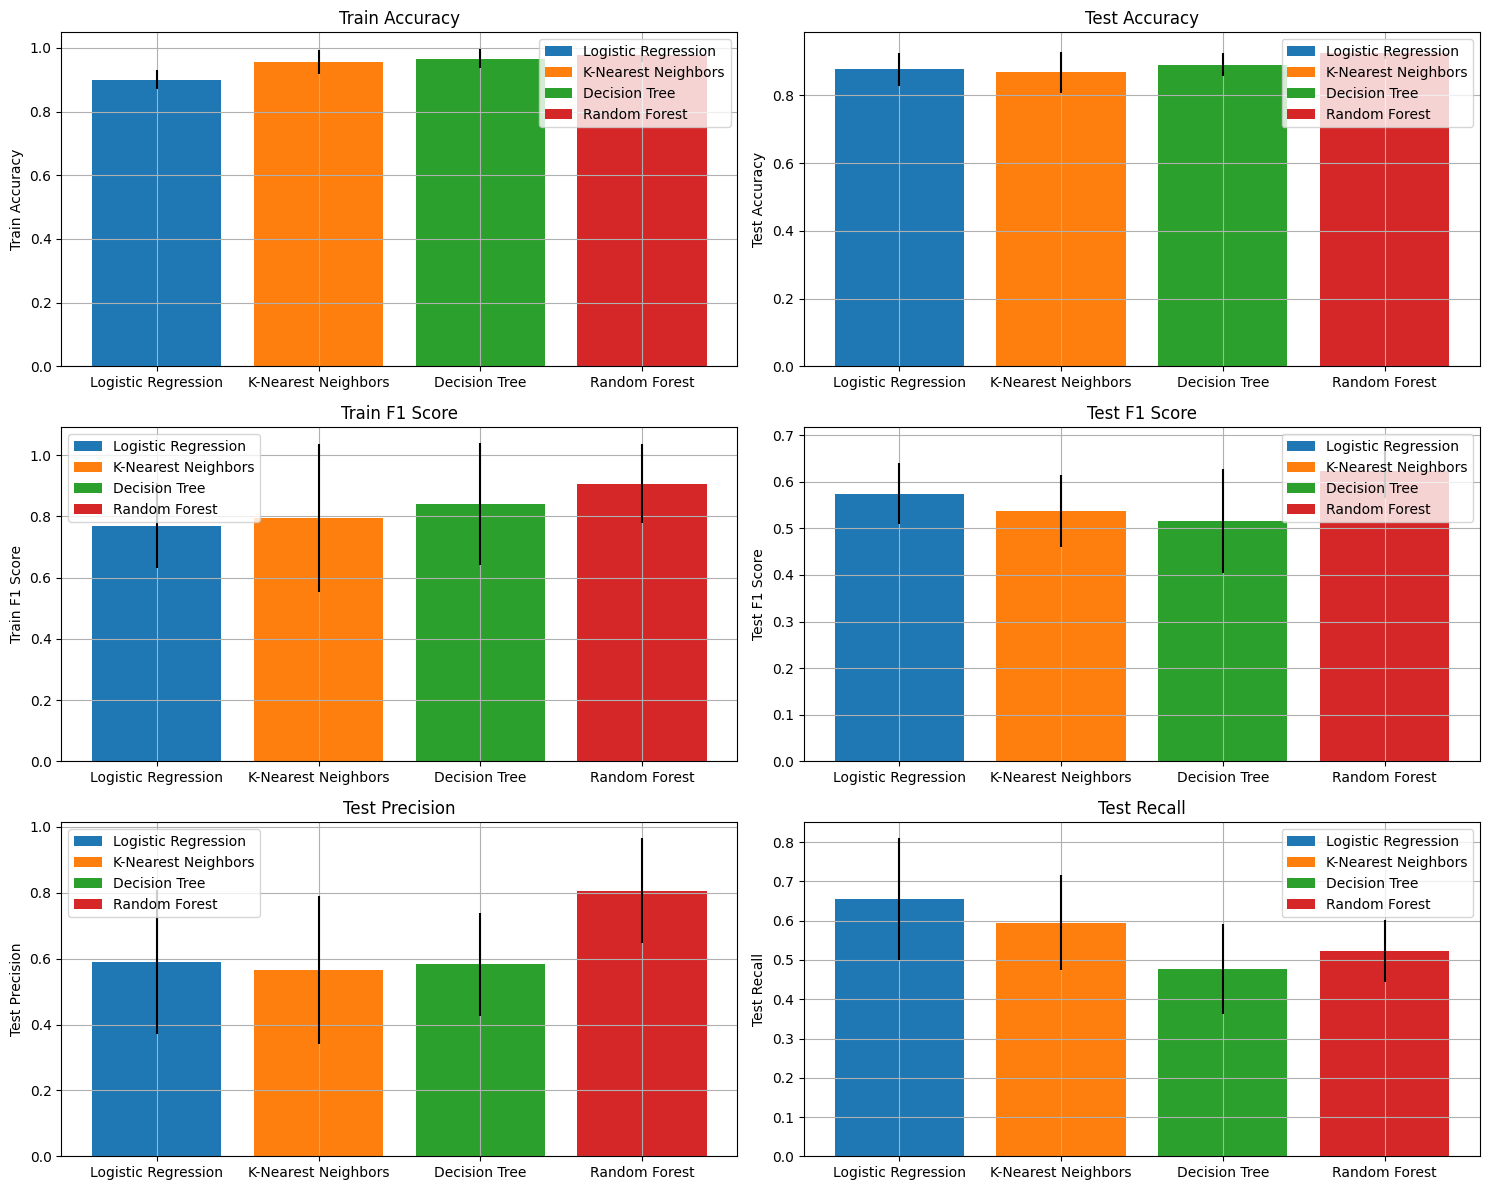

In [ ]:
## Plot average performance metrics for each model

# Create subplots for each performance metric
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

metrics = ['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score', 'Test Precision', 'Test Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for model in results['Model'].unique():
        model_data = results[results['Model'] == model]
        ax.bar(model, model_data[metric].mean(), yerr=model_data[metric].std(), label=model)

    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

**These bar charts represent the average performances of the models across different evaluation metrics on the test data. This visualization focuses solely on comparing how models performed without distinguishing between balancing techniques and feature selection techniques.**

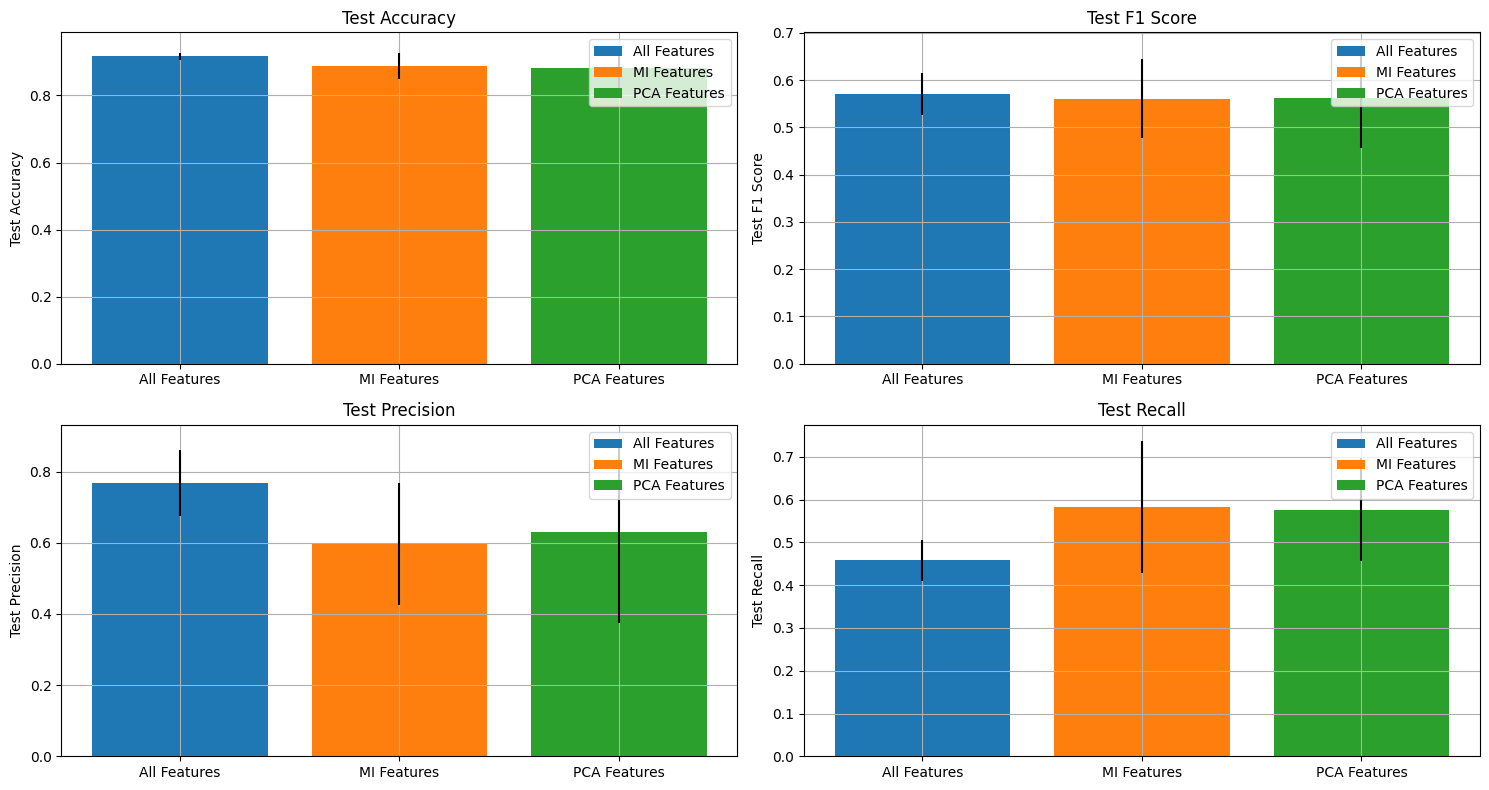

In [ ]:
## Average performance metrics for each feature selection technique

# Create subplots for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

metrics = ['Test Accuracy', 'Test F1 Score', 'Test Precision', 'Test Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for fs in results['Feature Selection'].unique():
        fs_data = results[results['Feature Selection'] == fs]
        ax.bar(fs, fs_data[metric].mean(), yerr=fs_data[metric].std(), label=fs)

    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


**These plots illustrate how models performed with different feature selection techniques, allowing us to compare the relative performance of each technique.**

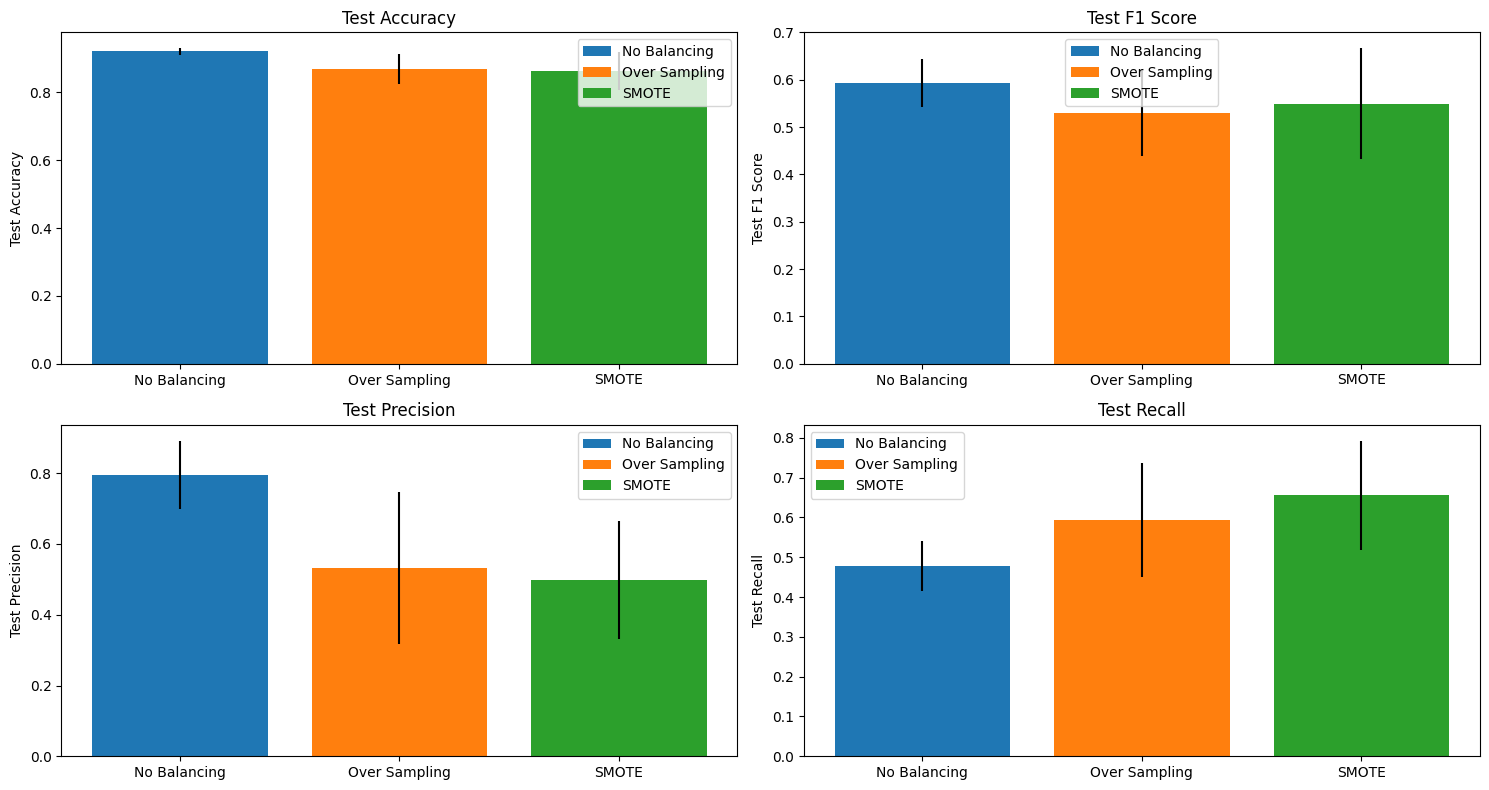

In [ ]:
## Average performance metrics for each balancing technique

# Create subplots for each performance metric
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

metrics = ['Test Accuracy', 'Test F1 Score', 'Test Precision', 'Test Recall']

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    for bal in results['Balancing'].unique():
        bal_data = results[results['Balancing'] == bal]
        ax.bar(bal, bal_data[metric].mean(), yerr=bal_data[metric].std(), label=bal)

    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.legend()
plt.tight_layout()
plt.show()

**Similarly, these plots compare the balancing techniques used in the analysis. They show the performance comparison between datasets without balancing, datasets oversampled, and datasets balanced using SMOTE.**

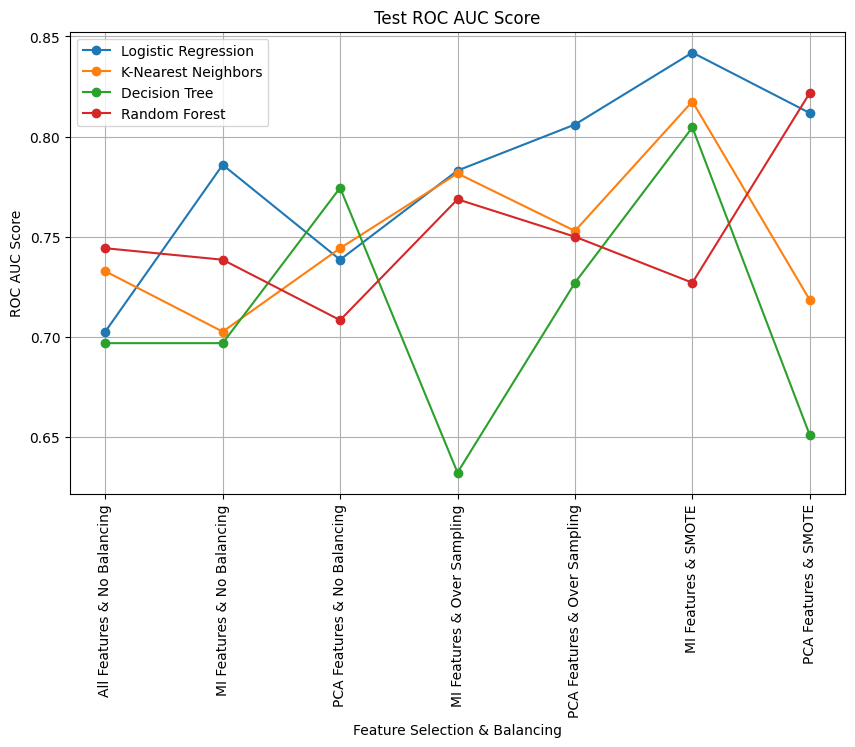

In [ ]:
## Plotting ROC Score for each model

plt.figure(figsize=(10, 6))
for model in results['Model'].unique():
    model_data = results[results['Model'] == model]
    plt.plot(model_data['Feature Selection'] + " & " + model_data['Balancing'], model_data['Test ROC AUC'], label=model, marker='o')

plt.title('Test ROC AUC Score')
plt.xlabel('Feature Selection & Balancing')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

**We can observe the comparison of ROC-AUC test scores, showing that logistic regression outperforms other models significantly in terms of test ROC-AUC score.**

In [ ]:
## Training Optimal Model: Logistic Regression - MI Features - No Balancing

log_reg = LogisticRegression(C=10, random_state=42)
log_reg.fit(X_train_mi, y_train)
y_train_pred = log_reg.predict(X_train_mi)
y_test_pred = log_reg.predict(X_test_mi)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

test_roc_auc = roc_auc_score(y_test, y_test_pred)

print('Model Evaluation Metrics:')
print(f'Train Accuracy: {np.round(train_accuracy, 2)} | Test Accuracy: {np.round(test_accuracy, 2)}')
print(f'Train F1 Score: {np.round(train_f1, 2)} | Test F1 Score: {np.round(test_f1, 2)}')
print(f'Test Precision: {np.round(test_precision, 2)}')
print(f'Test Recall: {np.round(test_recall, 2)}')
print(f'Test ROC AUC: {np.round(test_roc_auc, 2)}')

Model Evaluation Metrics:
Train Accuracy: 0.93 | Test Accuracy: 0.94
Train F1 Score: 0.59 | Test F1 Score: 0.7
Test Precision: 0.88
Test Recall: 0.58
Test ROC AUC: 0.79


**The model achieves high accuracy scores on both training and test datasets, indicating that it generalizes well to unseen data.**

**The F1 score, which balances precision and recall, shows a reasonable performance, indicating that the model is effective in correctly identifying positive cases (CKD35) while maintaining a balance between precision and recall. The model exhibits high precision (0.88), meaning that when it predicts CKD35, it is correct 88% of the time. The recall (0.58) suggests that the model correctly identifies 58% of all actual CKD35 cases.**

**The ROC AUC score of 0.79 indicates that the model performs reasonably well in distinguishing between positive and negative cases.**

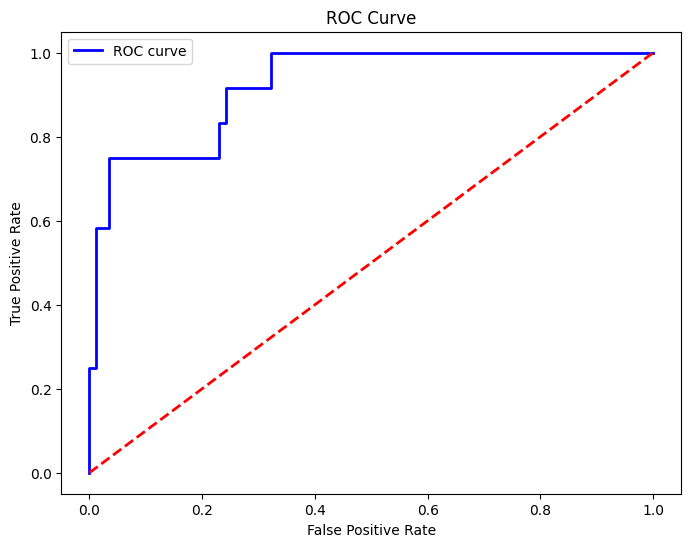

In [ ]:
## Plotting the ROC Curve

# Get the probabilities for each class
y_test_probs = log_reg.predict_proba(X_test_mi)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**This plot displays the ROC-AUC curve on the test data. The ROC curve illustrates how well the model distinguishes between positive and negative cases by plotting the True Positive Rate against the False Positive Rate at different threshold settings. A higher ROC AUC score indicates better overall performance of the model in classification tasks.**

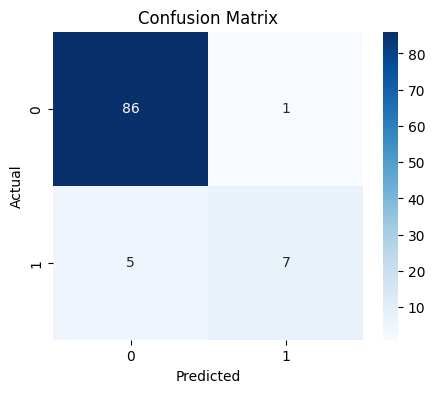

In [ ]:
## Plot Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Based on the provided confusion matrix:**

- **True Negatives (TN): 86 records were correctly predicted as false.**
- **True Positives (TP): 7 records were correctly predicted as true.**
- **False Positives (FP): 1 actual false record was incorrectly predicted as true.**
- **False Negatives (FN): 5 true positive records were incorrectly predicted as false.**

**This confusion matrix provides a breakdown of how the model's predictions align with the actual outcomes across binary classes, highlighting the correct and incorrect predictions of true and false instances.**

## 5. MODEL INTERPRETATION USING SHAP

In [ ]:
## Applying SHAP for Logistic Regression

explainer = shap.Explainer(log_reg, X_train_mi)
shap_values = explainer(X_test_mi)

**SHAP was implemented to explain the model's predictions on the test data. The plots will help us understand the impact of each feature on the model's predictions.**

**SHAP (SHapley Additive exPlanations) is a method used for explaining individual predictions in machine learning models. It provides insights into the contribution of each feature to the model's prediction for a particular instance.**


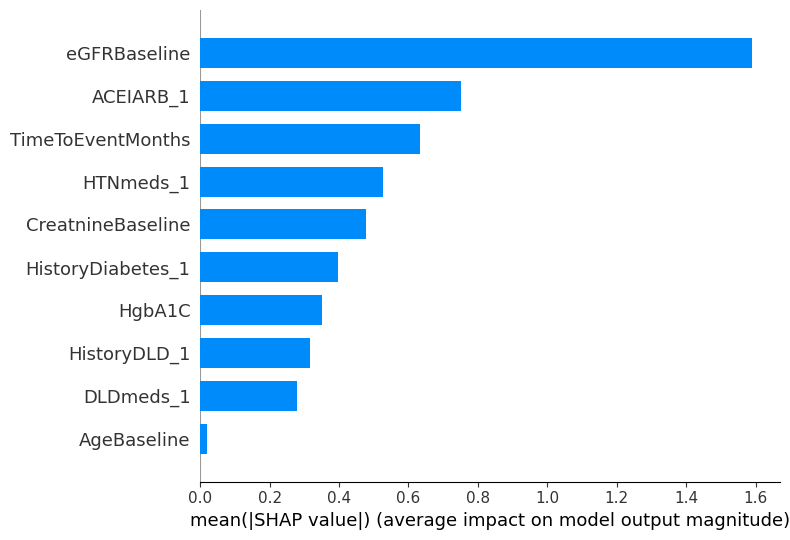

In [ ]:
# Summary Plot

shap.summary_plot(shap_values, X_test_mi, plot_type='bar', max_display=10)

**This summary plot helps us understand the importance of different features in the prediction. We observe that `eGFRBaseline`, `TimeToEventMonths`, `ACEIARB_1`, `HTNmeds_1`, and `CreatinineBaseline` exhibit significant impacts compared to the other five features on the prediction.**

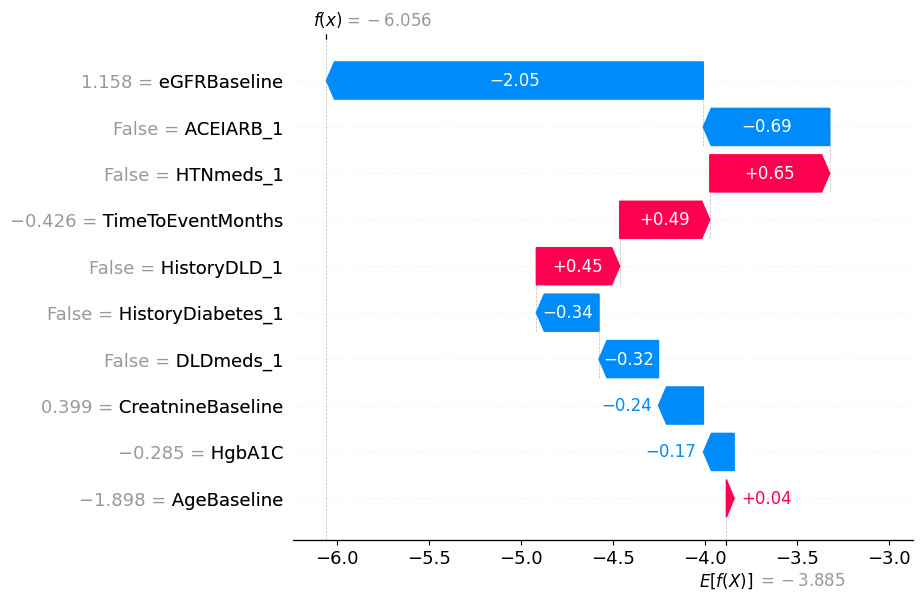

In [ ]:
## Waterfall Plot

shap.waterfall_plot(shap_values[0])

**This waterfall chart illustrates how different features contribute positively or negatively to the prediction. `eGFRBaseline` and `ACEIARB_1` are shown to have positive impacts, while `HTNmeds_1` has a similar but opposite impact compared to ACE-IARB.**
,

### Discussion of Results and Implications

#### Model Performance

**The logistic regression model using MI features and no balancing shows promising results for predicting severe chronic kidney disease (CKD) events among patients with or at risk of cardiovascular disease. The confusion matrix and associated metrics provide a comprehensive overview of the model's performance:**

- **Accuracy (0.94)**: **Indicates that the model correctly predicts 94% of the cases.**
- **Precision (0.88)**: **Demonstrates that 88% of the positive predictions are correct.**
- **Recall (0.58)**: **Reflects that 58% of actual positive cases are correctly identified by the model.**
- **F1 Score (0.7)**: **Balances precision and recall, showing the model's overall effectiveness.**
- **ROC AUC (0.79)**: **Shows good discriminative ability of the model.**

**These metrics highlight the model's robustness, particularly in distinguishing true positives (TP) from false positives (FP) and true negatives (TN) from false negatives (FN).**

#### Implications

**The high accuracy and precision of the model suggest it can be a reliable tool for early identification of patients at risk of severe CKD events. This early detection is crucial for timely intervention and management, potentially improving patient outcomes and reducing healthcare costs.**

**The lower recall indicates that some true positive cases are missed. While the model performs well in confirming CKD events, there is room for improvement in identifying all at-risk patients. Enhancing recall could involve adjusting the decision threshold or incorporating additional features to capture more subtle indicators of CKD risk.**

#### Applications of the Model

1. **Clinical Decision Support**: **The model can aid healthcare professionals in identifying high-risk patients, enabling proactive management strategies.**
2. **Patient Monitoring**: **Regular monitoring of at-risk patients using this model can prompt early interventions, such as lifestyle modifications, medication adjustments, or more frequent check-ups.**
3. **Resource Allocation**: **Healthcare facilities can prioritize resources for patients identified as high-risk, ensuring they receive the necessary care promptly.**
4. **Research and Development**: **The model can serve as a foundation for further research into CKD predictors, potentially leading to more refined models or the discovery of new risk factors.**

#### Risks and Limitations

1. **False Negatives**: **The model's recall indicates a risk of missing some true positive cases. These patients might not receive the necessary early intervention, potentially leading to worse health outcomes.**
2. **Bias in Data**: **The dataset's demographic and clinical characteristics are specific to Tawam Hospital in Abu Dhabi. The model might not generalize well to other populations without further validation and adjustment.**
3. **Over-reliance on the Model**: **While the model is a useful tool, clinical decisions should not rely solely on its predictions. It should complement, not replace, the clinical judgment of healthcare professionals.**
4. **Data Quality and Availability**: **The accuracy of predictions depends on the quality and completeness of the input data. Missing or erroneous data can adversely affect model performance. intervention. However, ongoing refinement and cautious application are essential to maximize its benefits and minimize potential risks.**

### 6. SUB-GROUP ANALYSIS

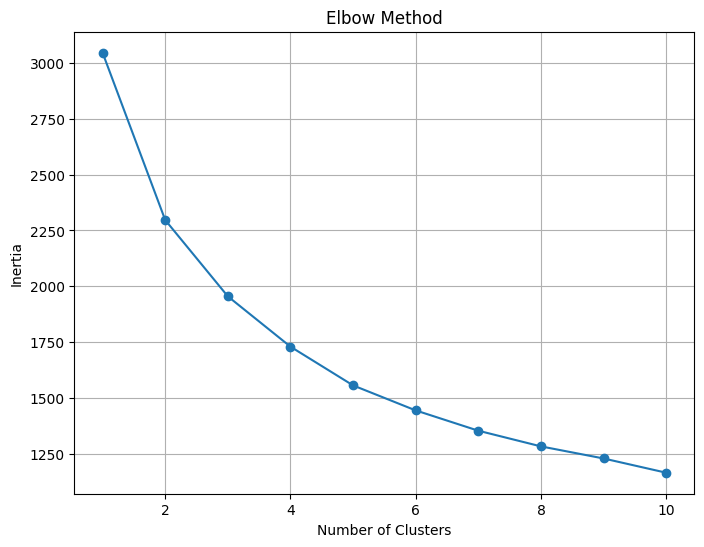

In [ ]:
## Finding Optimal Number of Clusters

X = pd.concat([X_train_mi, X_test_mi], axis=0)  # Combine train and test set
y = pd.concat([y_train, y_test], axis=0)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

**For the subgroup analysis, we have chosen the unsupervised machine learning model k-means, which classifies or clusters the data points based on similarities. To determine the optimal number of clusters, we used the ELBO method.**

**The ELBO (Elbow) method is a heuristic used to determine the optimal number of clusters in k-means clustering. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow" point where the rate of decrease sharply slows. This point indicates a balance between the number of clusters and the explained variance.**

**For our analysis, we considered a range of clusters from 1 to 11. The ELBO method indicated that the optimal number of clusters for this analysis is 3.**

In [ ]:
## KMeans Clustering with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assigning the cluster to the data
X['Cluster'] = kmeans.labels_
X['Cluster'].value_counts()

Cluster
1    221
0    199
2     71
Name: count, dtype: int64

**After determining the optimal number of clusters, we implemented the k-means clustering technique with \( n = 3 \). This resulted in three clusters:**
- **Cluster 0 with 199 records**
- **Cluster 1 with 221 records**
- **Cluster 2 with 71 records**

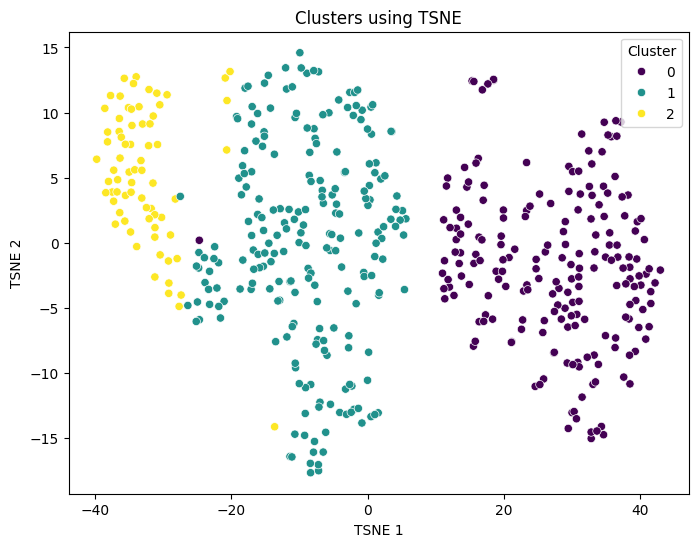

In [ ]:
## Plottting the clusters - tsne

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=X['Cluster'], palette='viridis')
plt.title('Clusters using TSNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()

**To visualize the clustering, we used the t-SNE method. t-SNE (t-Distributed Stochastic Neighbor Embedding) is a technique that reduces the dimensionality of the dataset to a 2D space, making it easier to visualize. In the scatter plot, each cluster is represented by a different color, clearly showing how the data points are grouped into clusters.**

In [ ]:
## Creating a DataFrame to store the model results

cluster_results = pd.DataFrame(columns=['Cluster', 'Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score',
                                        'Test Precision', 'Test Recall'])

**Now, we will train our optimal model on each of the clusters separately to observe how the model behaves on different segments of the dataset.**

In [ ]:
## function to evaluate the model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)

    return train_accuracy, test_accuracy, train_f1, test_f1, test_precision, test_recall

In [ ]:
## Training and Testing the model on full dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(C=10, random_state=42)
cluster_results.loc[len(cluster_results)] = ['Full Dataset'] + list(evaluate_model(log_reg, X_train, y_train, X_test, y_test))

In [ ]:
## Training and Testing the model on each cluster

for cluster in np.sort(X['Cluster'].unique()):
    X_train_cluster = X_train[X_train['Cluster'] == cluster].drop('Cluster', axis=1)
    y_train_cluster = y_train[X_train_cluster.index]

    X_test_cluster = X_test[X_test['Cluster'] == cluster].drop('Cluster', axis=1)
    y_test_cluster = y_test[X_test_cluster.index]

    log_reg = LogisticRegression(C=10, random_state=42)
    cluster_results.loc[len(cluster_results)] = [f'Cluster {cluster}'] + list(evaluate_model(log_reg, X_train_cluster, y_train_cluster, X_test_cluster, y_test_cluster))

In [ ]:
## Results

cluster_results.to_csv('cluster_results.csv', index=False)
cluster_results

,Cluster,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Test Precision,Test Recall
0,Full Dataset,0.920918,0.949495,0.607595,0.666667,0.833333,0.555556
1,Cluster 0,0.993711,1.000000,0.000000,0.000000,0.000000,0.000000
2,Cluster 1,0.915254,0.931818,0.210526,0.000000,0.000000,0.000000
3,Cluster 2,0.714286,0.800000,0.757576,0.800000,0.750000,0.857143


**The models were trained and tested on the entire dataset as well as on the individual clusters (Cluster 0, Cluster 1, and Cluster 2). The performance metrics for each model on these different segments can be seen in the table above.**

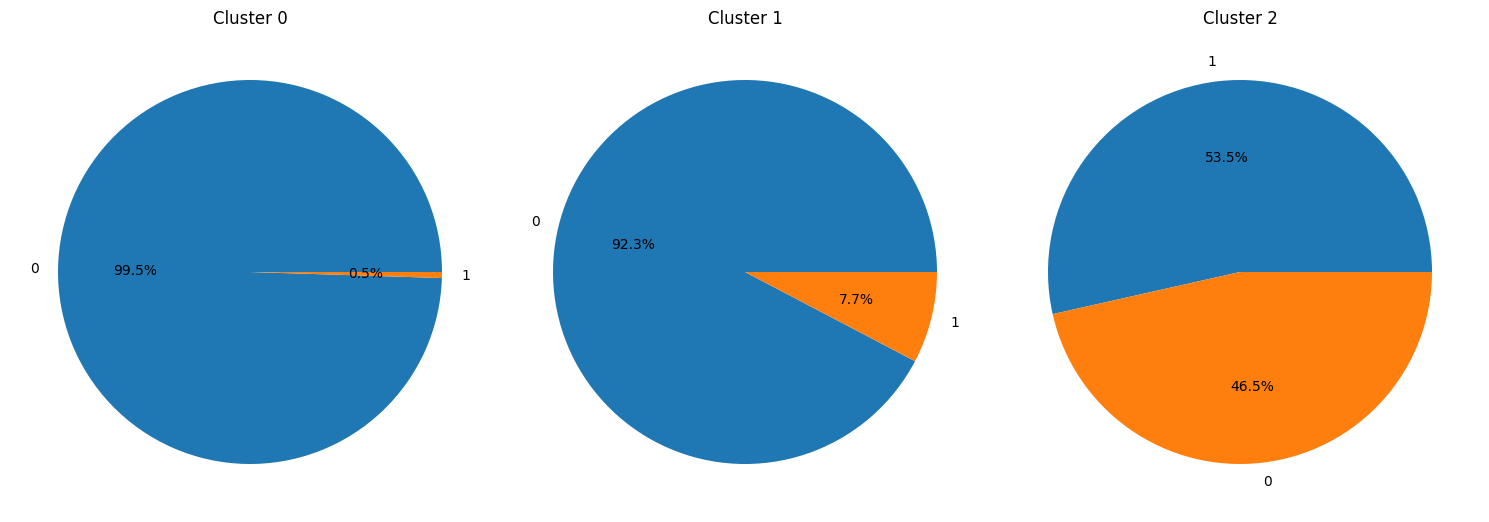

In [ ]:
## Distribution of the target variable in each cluster

plt.figure(figsize=(15, 10))
for i, cluster in enumerate(np.sort(X['Cluster'].unique())):
    plt.subplot(1, 3, i+1)
    y_cluster = y[X['Cluster'] == cluster]
    y_cluster.value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Cluster {cluster}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**We observe that the test F1 score and train F1 score for Cluster 0 is 0, and the test F1 score for Cluster 1 is also 0. This is due to the high level of bias in Cluster 0 and Cluster 1, which have an insignificant number of records where the target variable is 1. Specifically, in Cluster 0, 99.5% of the records have 0 as the target variable's value, and in Cluster 1, 92.3% of the records have 0 as the target variable's value. Cluster 2 has shown better performance with a train F1 score of 0.75 and a test F1 score of 0.8 because the data in Cluster 2 is more balanced, with 53% of the records having the target value of 1 and 46.5% having the target value of 0.**